# Auditory Perceptual Framing Analysis Script (2021). Click discrimination task.
## Pupil info extract

# 0.  Load pupil data participants


In [22]:
# Select participants
#select_subj = [2] 
#choiceNameFrames = list()

#for i in np.arange(len(select_subj)):
choiceNameFrames1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pupil data/Output/eyeData_pilots_1_41_blinkSacc_XYinfo_100hz.txt')

In [23]:
choiceNameFrames1

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pupil data/Output/eyeData_pilots_1_41_blinkSacc_XYinfo_100hz.txt']

# Modify input so it can constructed as dataframe

In [24]:
# replace elements in txt to allow separation to dataframe
f1 = open(choiceNameFrames1[0], 'r')
f2 = open('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pupil data/Output/eye_infoFull_report_fix_blink_100Hz.txt', 'w')
for line in f1:
    if line.find('TRACKER_TIME')>-1:
        tracker_idx = line.find('TRACKER_TIME')
        semicol_idx = line.find(';')
        
        if semicol_idx>-1: # if there is a semicolon, i.e. there is another event in the line, delete an leave the other event
            to_remove = line[tracker_idx:semicol_idx+1]
            line = line.replace(to_remove, '')
        else: # if there us only a tracker event
            to_remove = line[tracker_idx:tracker_idx+27]
            line = line.replace(to_remove, '.')

        #remove lines that cause trouble for inclusion in dataframe later
        print('Changed LINE')
        print(line)
        
        f2.write(line)

    else:
        if '!MODE RECORD CR 500 2 1 R' in line:
            f2.write(line.replace('!MODE RECORD CR 500 2 1 R', '!MODE_RECORD_CR_500_2_1_R'))
        else:
            f2.write(line.replace('!MODE RECORD CR 500 2 1 L', '!MODE_RECORD_CR_500_2_1_L'))

f1.close()
f2.close()

Changed LINE
Pilot21	1	.	2487.00	SLIDER_KEYB_ACCEPT	873033.00	785313	.	0	529.50	336.10	.	.

Changed LINE
Pilot21	6	.	2537.00	TIMER_SND	1006275.00	1003205	.	0	524.60	359.00	.	.

Changed LINE
Pilot21	10	.	1565.00	SLIDER_KEYB_L	1066517.00	1059077	.	0	684.30	605.10	.	.

Changed LINE
Pilot21	12	.	2585.00	SND_CHOICE	1128252.00	1123332	.	0	524.00	423.50	.	.

Changed LINE
Pilot21	15	.	1646.00	FIRST_SOUND_R	1188774.00	1186674	.	0	469.20	328.20	.	.

Changed LINE
Pilot21	19	.	1093.00	SLIDER_KEYB_ACCEPT	1248800.00	1237520	.	0	526.90	700.40	.	.

Changed LINE
Pilot21	29	.	886.00	FIRST_SOUND_R	1441316.00	1439226	.	0	533.50	389.10	.	.

Changed LINE
Pilot21	36	.	2332.00	.	1575792.00	1569162	.	0	512.40	411.30	.	.

Changed LINE
Pilot21	40	.	1019.00	FIRST_SOUND_R	1636280.00	1634190	.	0	524.00	305.50	.	.

Changed LINE
Pilot21	48	.	1542.00	.	1757804.00	1755734	.	0	494.70	281.20	.	.

Changed LINE
Pilot21	52	.	2063.00	FIRST_SOUND_R	1818360.00	1816270	.	0	475.20	331.00	.	.

Changed LINE
Pilot21	60	.	2175.00	.	

# Load modified pupil info

In [22]:
pupilDF1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pupil data/Output/eye_infoFull_report_fix_blink_100Hz.txt')
pupilInfo = pd.read_csv(pupilDF1[0],sep='\t')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
pupilInfo

RECORDING_SESSION_LABEL  TRIAL_INDEX RIGHT_PUPIL_SIZE LEFT_PUPIL_SIZE  \
0                       Pilot21            1                .         2747.00   
1                       Pilot21            1                .         2758.00   
2                       Pilot21            1                .         2770.00   
3                       Pilot21            1                .         2788.00   
4                       Pilot21            1                .         2790.00   
...                         ...          ...              ...             ...   
7831786                 Pilot41          200          1253.00               .   
7831787                 Pilot41          200          1128.00               .   
7831788                 Pilot41          200          1100.00               .   
7831789                 Pilot41          200          1151.00               .   
7831790                 Pilot41          200          1220.00               .   

                    SAMPLE_MESSAGE   TIMESTAMP IP_START_TIME RIGHT_IN_SACCADE  \
0        !MODE_RECORD_CR_500_2_1_L    785313.0        785313                .   
1                                .    785323.0        785313                .   
2                                .    785333.0        785313                .   
3                                .    785343.0        785313                .   
4                                .    785353.0        785313                .   
...                            ...         ...           ...              ...   
7831786                          .  10205455.0      10195915                1   
7831787                          .  10205465.0      10195915                1   
7831788         SLIDER_KEYB_ACCEPT  10205475.0      10195915                1   
7831789                          .  10205485.0      10195915                1   
7831790                          .  10205495.0      10195915                1   

        LEFT_IN_SACCADE LEFT_GAZE_X LEFT_GAZE_Y RIGHT_GAZE_X RIGHT_GAZE_Y  
0                     0      507.30      365.00            .            .  
1                     0      508.80      363.40            .            .  
2                     0      510.10      361.10            .            .  
3                     0      511.30      358.70            .            .  
4                     0      512.20      358.90            .            .  
...                 ...         ...         ...          ...          ...  
7831786               .           .           .       633.40       753.30  
7831787               .           .           .       599.80       772.70  
7831788               .           .           .       569.90       723.80  
7831789               .           .           .       563.60       668.70  
7831790               .           .           .       560.60       617.60  

[7831791 rows x 13 columns]

In [24]:
np.unique(pupilInfo.RECORDING_SESSION_LABEL)

array(['P33x2', 'Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot14',
       'Pilot15', 'Pilot16', 'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20',
       'Pilot21', 'Pilot22', 'Pilot23', 'Pilot24', 'Pilot25', 'Pilot26',
       'Pilot27', 'Pilot28', 'Pilot29', 'Pilot3', 'Pilot30', 'Pilot31',
       'Pilot32', 'Pilot34', 'Pilot35', 'Pilot36', 'Pilot37', 'Pilot38',
       'Pilot39', 'Pilot4', 'Pilot40', 'Pilot41', 'Pilot5', 'Pilot6',
       'Pilot7', 'Pilot8', 'Pilot9', 'pilot1', 'pilot2'], dtype=object)

---------------------------

# 1. Preliminar analysis 

# reject participants 

In [25]:

# rejected participants

rej_part0 = ['pilot1','pilot2','Pilot3'] # reject pilot participants
rej_part00 = ['Pilot6', 'Pilot7', 'Pilot14', 'Pilot16', 'Pilot26', 'Pilot28'] # rejected by accuracy 
rej_part = rej_part0 + rej_part00 

In [26]:
rej_part

['pilot1',
 'pilot2',
 'Pilot3',
 'Pilot6',
 'Pilot7',
 'Pilot14',
 'Pilot16',
 'Pilot26',
 'Pilot28']

In [27]:
for j in rej_part:
    pupilInfo = pupilInfo.loc[(pupilInfo['RECORDING_SESSION_LABEL'] !=  j)]

In [28]:
pupilInfo

RECORDING_SESSION_LABEL  TRIAL_INDEX RIGHT_PUPIL_SIZE LEFT_PUPIL_SIZE  \
0                       Pilot21            1                .         2747.00   
1                       Pilot21            1                .         2758.00   
2                       Pilot21            1                .         2770.00   
3                       Pilot21            1                .         2788.00   
4                       Pilot21            1                .         2790.00   
...                         ...          ...              ...             ...   
7831786                 Pilot41          200          1253.00               .   
7831787                 Pilot41          200          1128.00               .   
7831788                 Pilot41          200          1100.00               .   
7831789                 Pilot41          200          1151.00               .   
7831790                 Pilot41          200          1220.00               .   

                    SAMPLE_MESSAGE   TIMESTAMP IP_START_TIME RIGHT_IN_SACCADE  \
0        !MODE_RECORD_CR_500_2_1_L    785313.0        785313                .   
1                                .    785323.0        785313                .   
2                                .    785333.0        785313                .   
3                                .    785343.0        785313                .   
4                                .    785353.0        785313                .   
...                            ...         ...           ...              ...   
7831786                          .  10205455.0      10195915                1   
7831787                          .  10205465.0      10195915                1   
7831788         SLIDER_KEYB_ACCEPT  10205475.0      10195915                1   
7831789                          .  10205485.0      10195915                1   
7831790                          .  10205495.0      10195915                1   

        LEFT_IN_SACCADE LEFT_GAZE_X LEFT_GAZE_Y RIGHT_GAZE_X RIGHT_GAZE_Y  
0                     0      507.30      365.00            .            .  
1                     0      508.80      363.40            .            .  
2                     0      510.10      361.10            .            .  
3                     0      511.30      358.70            .            .  
4                     0      512.20      358.90            .            .  
...                 ...         ...         ...          ...          ...  
7831786               .           .           .       633.40       753.30  
7831787               .           .           .       599.80       772.70  
7831788               .           .           .       569.90       723.80  
7831789               .           .           .       563.60       668.70  
7831790               .           .           .       560.60       617.60  

[6171153 rows x 13 columns]

In [29]:
len(pupilInfo['RECORDING_SESSION_LABEL'].unique())

32

In [30]:
pupilInfo

RECORDING_SESSION_LABEL  TRIAL_INDEX RIGHT_PUPIL_SIZE LEFT_PUPIL_SIZE  \
0                       Pilot21            1                .         2747.00   
1                       Pilot21            1                .         2758.00   
2                       Pilot21            1                .         2770.00   
3                       Pilot21            1                .         2788.00   
4                       Pilot21            1                .         2790.00   
...                         ...          ...              ...             ...   
7831786                 Pilot41          200          1253.00               .   
7831787                 Pilot41          200          1128.00               .   
7831788                 Pilot41          200          1100.00               .   
7831789                 Pilot41          200          1151.00               .   
7831790                 Pilot41          200          1220.00               .   

                    SAMPLE_MESSAGE   TIMESTAMP IP_START_TIME RIGHT_IN_SACCADE  \
0        !MODE_RECORD_CR_500_2_1_L    785313.0        785313                .   
1                                .    785323.0        785313                .   
2                                .    785333.0        785313                .   
3                                .    785343.0        785313                .   
4                                .    785353.0        785313                .   
...                            ...         ...           ...              ...   
7831786                          .  10205455.0      10195915                1   
7831787                          .  10205465.0      10195915                1   
7831788         SLIDER_KEYB_ACCEPT  10205475.0      10195915                1   
7831789                          .  10205485.0      10195915                1   
7831790                          .  10205495.0      10195915                1   

        LEFT_IN_SACCADE LEFT_GAZE_X LEFT_GAZE_Y RIGHT_GAZE_X RIGHT_GAZE_Y  
0                     0      507.30      365.00            .            .  
1                     0      508.80      363.40            .            .  
2                     0      510.10      361.10            .            .  
3                     0      511.30      358.70            .            .  
4                     0      512.20      358.90            .            .  
...                 ...         ...         ...          ...          ...  
7831786               .           .           .       633.40       753.30  
7831787               .           .           .       599.80       772.70  
7831788               .           .           .       569.90       723.80  
7831789               .           .           .       563.60       668.70  
7831790               .           .           .       560.60       617.60  

[6171153 rows x 13 columns]

## Notice some pilots have pupil information of the left eye and other of the right eye. Put them both in a single column

In [31]:
pupilInfo['pupilSizeAll'] = pd.to_numeric(pupilInfo['RIGHT_PUPIL_SIZE'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_PUPIL_SIZE'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_PUPIL_SIZE', 'LEFT_PUPIL_SIZE'])

pupilInfo['saccAll'] = pd.to_numeric(pupilInfo['RIGHT_IN_SACCADE'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_IN_SACCADE'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_IN_SACCADE', 'LEFT_IN_SACCADE'])

In [32]:
pupilInfo['gazeXAll'] = pd.to_numeric(pupilInfo['RIGHT_GAZE_X'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_GAZE_X'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_GAZE_X', 'LEFT_GAZE_X'])

pupilInfo['gazeYAll'] = pd.to_numeric(pupilInfo['RIGHT_GAZE_Y'].replace('.', 0)) +  pd.to_numeric(pupilInfo['LEFT_GAZE_Y'].replace('.', 0))
pupilInfo = pupilInfo.drop(columns=['RIGHT_GAZE_Y', 'LEFT_GAZE_Y'])

## sort participants within dataframe

In [33]:
pupilInfo = pupilInfo.sort_values(by=['RECORDING_SESSION_LABEL', 'TRIAL_INDEX','TIMESTAMP'])
pupilInfo = pupilInfo.reset_index(drop=True)

In [34]:
#pupilInfo

In [35]:
pupilInfo.RECORDING_SESSION_LABEL.unique()

array(['P33x2', 'Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot15',
       'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20', 'Pilot21', 'Pilot22',
       'Pilot23', 'Pilot24', 'Pilot25', 'Pilot27', 'Pilot29', 'Pilot30',
       'Pilot31', 'Pilot32', 'Pilot34', 'Pilot35', 'Pilot36', 'Pilot37',
       'Pilot38', 'Pilot39', 'Pilot4', 'Pilot40', 'Pilot41', 'Pilot5',
       'Pilot8', 'Pilot9'], dtype=object)

In [36]:
#pupilInfo.loc[(pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot1')].TRIAL_INDEX.unique()


In [37]:
#pupilInfo.RECORDING_SESSION_LABEL.unique()

## remove practice trials (for pilots) (pilots have 20 practice trials) 

In [38]:
pupilInfo = pupilInfo.loc[pupilInfo['TRIAL_INDEX']>20] 
#pupilInfo = pupilInfo.loc[((pupilInfo['TRIAL_INDEX']>20) & ((pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot4') | (pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot5')))  | (pupilInfo['RECORDING_SESSION_LABEL']  == 'Pilot2')] 

pupilInfo = pupilInfo.reset_index(drop = True)

In [39]:
len(pupilInfo.TRIAL_INDEX.unique())

180

In [40]:
pupilInfo

RECORDING_SESSION_LABEL  TRIAL_INDEX             SAMPLE_MESSAGE  \
0                         P33x2           21  !MODE_RECORD_CR_500_2_1_R   
1                         P33x2           21                          .   
2                         P33x2           21                          .   
3                         P33x2           21                          .   
4                         P33x2           21                          .   
...                         ...          ...                        ...   
5489081                  Pilot9          200                          .   
5489082                  Pilot9          200                          .   
5489083                  Pilot9          200         SLIDER_KEYB_ACCEPT   
5489084                  Pilot9          200                          .   
5489085                  Pilot9          200                          .   

         TIMESTAMP IP_START_TIME  pupilSizeAll  saccAll  gazeXAll  gazeYAll  
0        2856470.0       2856470        3112.0      0.0     516.9     379.6  
1        2856480.0       2856470        3118.0      0.0     517.7     379.4  
2        2856490.0       2856470        3116.0      0.0     517.1     379.1  
3        2856500.0       2856470        3119.0      0.0     517.3     378.4  
4        2856510.0       2856470        3117.0      0.0     518.9     378.7  
...            ...           ...           ...      ...       ...       ...  
5489081  3224276.0       3215516        1447.0      0.0     553.4     622.8  
5489082  3224286.0       3215516        1448.0      0.0     553.3     621.4  
5489083  3224296.0       3215516        1457.0      0.0     553.9     620.8  
5489084  3224306.0       3215516        1449.0      0.0     555.1     622.8  
5489085  3224316.0       3215516        1460.0      0.0     556.1     621.9  

[5489086 rows x 9 columns]

In [41]:
pupilInfo.gazeXAll.mean()

482.19484797647436

In [42]:
pupilInfo.gazeYAll.mean()

411.6237870592735

## Center is located in (512, 384) (full resolution 1024 × 768 pixels). I calculate a deviation index, from the center

In [43]:
pupilInfo['devIdx'] = (512 - pupilInfo['gazeXAll'])**2 + (384 - pupilInfo['gazeYAll'])**2 

## Blink (saccade) percent of all pupil time

In [44]:
blinkPerCent = []
for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]
    blinkPerCent.append([i,np.sum (np.isnan(pupilInfoPart.saccAll)),np.nansum(pupilInfoPart.saccAll.values), len(pupilInfoPart.saccAll),np.nansum(pupilInfoPart.saccAll.values)/len(pupilInfoPart.saccAll)])

In [45]:
blinkPerCent=pd.DataFrame(blinkPerCent,columns=['part','NanNum', 'saccNum', 'SampleNum','SaccPercent']) 

In [46]:
blinkPerCent

part  NanNum  saccNum  SampleNum  SaccPercent
0     P33x2       0  28022.0     172839     0.162128
1   Pilot10       0  41442.0     196601     0.210792
2   Pilot11       0  28191.0     173805     0.162199
3   Pilot12       0  10247.0     159878     0.064093
4   Pilot13       0  22292.0     176897     0.126017
5   Pilot15       0  31350.0     181152     0.173059
6   Pilot17       0  43243.0     173109     0.249802
7   Pilot18       0  32128.0     173377     0.185307
8   Pilot19       0  45536.0     168267     0.270618
9   Pilot20       0  11739.0     199238     0.058919
10  Pilot21       0  17193.0     157167     0.109393
11  Pilot22       0  39286.0     154869     0.253672
12  Pilot23       0  22334.0     175340     0.127375
13  Pilot24       0  25474.3     165235     0.154170
14  Pilot25       0  19527.0     161383     0.120998
15  Pilot27       0  11718.0     174403     0.067189
16  Pilot29       0  36113.0     173504     0.208139
17  Pilot30       0  51959.0     156478     0.332053
18  Pilot31       0  33750.0     163294     0.206682
19  Pilot32       0  21706.0     157069     0.138194
20  Pilot34       0  16668.0     184414     0.090384
21  Pilot35       0  49667.0     205510     0.241677
22  Pilot36       0  30762.0     166806     0.184418
23  Pilot37       0   9742.0     169933     0.057328
24  Pilot38       0  38894.0     155180     0.250638
25  Pilot39       0  23000.0     148815     0.154554
26   Pilot4       0  17187.0     171533     0.100196
27  Pilot40       0  19291.0     157974     0.122115
28  Pilot41       0  33328.0     210987     0.157962
29   Pilot5       0  13962.0     154059     0.090628
30   Pilot8       0  33362.0     180595     0.184734
31   Pilot9       0  18201.0     169375     0.107460

----------------------------------

# 2.1 Clean  Blinks

Notice that blinks are including inside the indicator of saccades as created by EyeLink dataviewer

In [47]:
## pupilCorrected = []
## i = 0
## totalNPupil  = len(pupilInfo)
## porcnt = 1
## while i < len(pupilInfo):
##     currInfo = pupilInfo.iloc[i]
##     currSacc = currInfo.saccAll    
##     
##     if currSacc == 0: # if this trial is not saccade (or blink)
##         pupilCorrected.append(currInfo.pupilSizeAll)
##         i += 1
##         continue
##     else:
##         pupilBegin = pupilInfo.iloc[i-1].pupilSizeAll
##         iBegin = i 
##         while pupilInfo.iloc[i].saccAll == 1:
##             i += 1
##             
##         pupilEnd = pupilInfo.iloc[i].pupilSizeAll
##         iEnd = i 
##         
##         interpolPupil = []
##         for ii in range(iEnd-iBegin):
##             
##             interpolPupil.append(pupilBegin + (ii - iBegin)/(iEnd-iBegin)*(pupilEnd -pupilBegin )) 
##         
##         pupilCorrected.extend(interpolPupil)
##         pupilCorrected.append(pupilInfo.iloc[i].pupilSizeAll)
##     
## 
##     
##     if i > totalNPupil*(0.05*porcnt):
##         print('5% done')
##         porcnt += 1
##         

In [48]:
pupilBlinkedSacc = pupilInfo.pupilSizeAll * (1 - pupilInfo.saccAll)
pupilBlinkedSacc = pupilBlinkedSacc.replace(0, np.nan)
pupilCorrected = pupilBlinkedSacc.interpolate()
#pupilInfo['pupilSizeAllRaw'] = pupilCorrected.pupilSizeAll

# 2.2. Apply bandpass filter on pupil signal

In [49]:
# from scipy.signal import butter, lfilter
# from scipy.signal import freqz
# 
# def butter_bandpass(lowcut, highcut, fs, order=2): # butterworth filter second order as used in Urai et al., 2017 (Nature Comms.)
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     return b, a
# 
# 
# def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
#     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#     y = lfilter(b, a, data)
#     return y
# 
# # Sample rate and desired cutoff frequencies (in Hz).
# fs = 500.0
# lowcut = 0.1
# highcut = 10.0
# 
# b, a = butter_bandpass(lowcut, highcut, fs, order = 2 )
# pupilCorrected = butter_bandpass_filter(pupilCorrected.values, lowcut, highcut, fs, order=2)

In [50]:
pupilInfo['pupilSizeBlinkInterp'] = pupilCorrected

# 2.3 Z-score each trial pupil info and calculate deviation index (to account for eye movements)

In [51]:
zPupil = []
zDevIdxSample = []
zDevIdxTrial = []

for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    print('Participant.....' + str(i))
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]

    for j in pupilInfoPart.TRIAL_INDEX.unique():
            pupilInfoPTrial = pupilInfoPart.loc[pupilInfoPart['TRIAL_INDEX'] == j]            
            
            # pupil size
            pupilTrial = pupilInfoPTrial.pupilSizeBlinkInterp.values
            zPupilInfoPTrial = (pupilTrial - np.mean(pupilTrial))/np.std(pupilTrial)       
      
            zPupil.extend(zPupilInfoPTrial) 
        
            # eye displacement using the deviation index is normalized using median value for trial (as in Lempert et al., 2015)
            devIdxTrial = pupilInfoPTrial.devIdx.values
            zDevIdxInfoPTrial = (devIdxTrial / np.median(devIdxTrial))       
      
            zDevIdxSample.extend(zDevIdxInfoPTrial) 
            zDevIdxTrial.append(np.mean(zDevIdxInfoPTrial)) 

        
        
pupilInfo['zPupil'] = zPupil
pupilInfo['zDevIdx'] = zDevIdxSample

Participant.....P33x2
Participant.....Pilot10
Participant.....Pilot11
Participant.....Pilot12
Participant.....Pilot13
Participant.....Pilot15
Participant.....Pilot17
Participant.....Pilot18
Participant.....Pilot19
Participant.....Pilot20
Participant.....Pilot21
Participant.....Pilot22
Participant.....Pilot23
Participant.....Pilot24
Participant.....Pilot25
Participant.....Pilot27
Participant.....Pilot29
Participant.....Pilot30
Participant.....Pilot31
Participant.....Pilot32
Participant.....Pilot34
Participant.....Pilot35
Participant.....Pilot36
Participant.....Pilot37
Participant.....Pilot38
Participant.....Pilot39
Participant.....Pilot4
Participant.....Pilot40
Participant.....Pilot41
Participant.....Pilot5
Participant.....Pilot8
Participant.....Pilot9


# 3 . Extract  pupil info surrounding event

In [52]:
indexDF = []

for i in pupilInfo.RECORDING_SESSION_LABEL.unique():
    print('Participant.....' + str(i))
    pupilInfoPart = pupilInfo.loc[pupilInfo['RECORDING_SESSION_LABEL'] == i]
    for j in pupilInfoPart.TRIAL_INDEX.unique():
        pupilInfoPTrial = pupilInfoPart.loc[pupilInfoPart['TRIAL_INDEX'] == j]
    
        firstSndDF = pupilInfoPTrial.loc[ (pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('FIRST_SOUND_R')) ]
        choiceDF = pupilInfoPTrial.loc[(pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_FEEDBACK_R')) |(pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_FEEDBACK_L')) ]
        itiDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('ITI_APPEAR')]
        sliderAcceptDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('SLIDER_KEYB_ACCEPT')]
        confBeginDF = pupilInfoPTrial.loc[pupilInfoPTrial['SAMPLE_MESSAGE'].str.contains('DISPLAY_BDM_CONF')] # moment confidence screen appears
        
        if firstSndDF.empty | choiceDF.empty | itiDF.empty | sliderAcceptDF.empty | confBeginDF.empty:
            firstSndDF = np.nan
            choiceDF = np.nan
            itiDF = np.nan
            sliderAcceptDF= np.nan
            confBeginDF= np.nan

            # IF THERE IS NO DATA, SKIP THIS TRIAL
            continue
        else:
            firstSndDF = int(firstSndDF.index.values[0])
            choiceDF = int(choiceDF.index.values[0])
            itiDF = int(itiDF.index.values[0])
            sliderAcceptDF= int(sliderAcceptDF.index.values[0])     
            confBeginDF= int(confBeginDF.index.values[0])     # pick the first confidence screen that appears on the trial
        
        indexDF.append([i,j, firstSndDF, choiceDF, itiDF, sliderAcceptDF, confBeginDF]) 
        

Participant.....P33x2
Participant.....Pilot10
Participant.....Pilot11
Participant.....Pilot12
Participant.....Pilot13
Participant.....Pilot15
Participant.....Pilot17
Participant.....Pilot18
Participant.....Pilot19
Participant.....Pilot20
Participant.....Pilot21
Participant.....Pilot22
Participant.....Pilot23
Participant.....Pilot24
Participant.....Pilot25
Participant.....Pilot27
Participant.....Pilot29
Participant.....Pilot30
Participant.....Pilot31
Participant.....Pilot32
Participant.....Pilot34
Participant.....Pilot35
Participant.....Pilot36
Participant.....Pilot37
Participant.....Pilot38
Participant.....Pilot39
Participant.....Pilot4
Participant.....Pilot40
Participant.....Pilot41
Participant.....Pilot5
Participant.....Pilot8
Participant.....Pilot9


In [53]:
indexDF=pd.DataFrame(indexDF,columns=['part','trial', 'firstSndIdx', 'choiceIdx','itiIdx', 'confAcceptIdx','confBeginIdx'])
indexDF

part  trial  firstSndIdx  choiceIdx   itiIdx  confAcceptIdx  \
0      P33x2     21          207        549        7           1037   
1      P33x2     22         1249       1515     1048           1955   
2      P33x2     23         2166       2312     1966           2706   
3      P33x2     24         2917       3052     2717           3588   
4      P33x2     25         3798       3973     3598           4566   
...      ...    ...          ...        ...      ...            ...   
5753  Pilot9    196      5484773    5484991  5484572        5485448   
5754  Pilot9    197      5485659    5485988  5485458        5486432   
5755  Pilot9    198      5486644    5486872  5486444        5487325   
5756  Pilot9    199      5487537    5487742  5487337        5488201   
5757  Pilot9    200      5488414    5488659  5488214        5489083   

      confBeginIdx  
0              850  
1             1817  
2             2614  
3             3353  
4             4275  
...            ...  
5753       5485292  
5754       5486290  
5755       5487174  
5756       5488044  
5757       5488960  

[5758 rows x 7 columns]

In [54]:
indexDF.loc[(indexDF['part'] == 'Pilot10') & (indexDF['trial'] == 21) ]

part  trial  firstSndIdx  choiceIdx  itiIdx  confAcceptIdx  \
180  Pilot10     21       173049     173455  172849         174476   

     confBeginIdx  
180        173757

In [55]:
indexDF

part  trial  firstSndIdx  choiceIdx   itiIdx  confAcceptIdx  \
0      P33x2     21          207        549        7           1037   
1      P33x2     22         1249       1515     1048           1955   
2      P33x2     23         2166       2312     1966           2706   
3      P33x2     24         2917       3052     2717           3588   
4      P33x2     25         3798       3973     3598           4566   
...      ...    ...          ...        ...      ...            ...   
5753  Pilot9    196      5484773    5484991  5484572        5485448   
5754  Pilot9    197      5485659    5485988  5485458        5486432   
5755  Pilot9    198      5486644    5486872  5486444        5487325   
5756  Pilot9    199      5487537    5487742  5487337        5488201   
5757  Pilot9    200      5488414    5488659  5488214        5489083   

      confBeginIdx  
0              850  
1             1817  
2             2614  
3             3353  
4             4275  
...            ...  
5753       5485292  
5754       5486290  
5755       5487174  
5756       5488044  
5757       5488960  

[5758 rows x 7 columns]

In [56]:
pupilInfo

RECORDING_SESSION_LABEL  TRIAL_INDEX             SAMPLE_MESSAGE  \
0                         P33x2           21  !MODE_RECORD_CR_500_2_1_R   
1                         P33x2           21                          .   
2                         P33x2           21                          .   
3                         P33x2           21                          .   
4                         P33x2           21                          .   
...                         ...          ...                        ...   
5489081                  Pilot9          200                          .   
5489082                  Pilot9          200                          .   
5489083                  Pilot9          200         SLIDER_KEYB_ACCEPT   
5489084                  Pilot9          200                          .   
5489085                  Pilot9          200                          .   

         TIMESTAMP IP_START_TIME  pupilSizeAll  saccAll  gazeXAll  gazeYAll  \
0        2856470.0       2856470        3112.0      0.0     516.9     379.6   
1        2856480.0       2856470        3118.0      0.0     517.7     379.4   
2        2856490.0       2856470        3116.0      0.0     517.1     379.1   
3        2856500.0       2856470        3119.0      0.0     517.3     378.4   
4        2856510.0       2856470        3117.0      0.0     518.9     378.7   
...            ...           ...           ...      ...       ...       ...   
5489081  3224276.0       3215516        1447.0      0.0     553.4     622.8   
5489082  3224286.0       3215516        1448.0      0.0     553.3     621.4   
5489083  3224296.0       3215516        1457.0      0.0     553.9     620.8   
5489084  3224306.0       3215516        1449.0      0.0     555.1     622.8   
5489085  3224316.0       3215516        1460.0      0.0     556.1     621.9   

           devIdx  pupilSizeBlinkInterp    zPupil    zDevIdx  
0           43.37                3112.0  0.499934   0.105183  
1           53.65                3118.0  0.516823   0.130114  
2           50.02                3116.0  0.511194   0.121311  
3           59.45                3119.0  0.519638   0.144181  
4           75.70                3117.0  0.514008   0.183591  
...           ...                   ...       ...        ...  
5489081  58739.40                1447.0 -2.941024  21.930452  
5489082  58064.45                1448.0 -2.936980  21.678458  
5489083  57829.85                1457.0 -2.900583  21.590870  
5489084  58883.05                1449.0 -2.932936  21.984084  
5489085  58541.22                1460.0 -2.888451  21.856461  

[5489086 rows x 13 columns]

In [57]:
indexDF.iloc[2500]


part             Pilot24
trial                182
firstSndIdx      2410798
choiceIdx        2410951
itiIdx           2410598
confAcceptIdx    2411467
confBeginIdx     2411253
Name: 2500, dtype: object

# Estimate baseline pupil

remember that the sampling time was 100hz, so we have 10ms between samples

In [58]:
pupilBaseline = []
for i in indexDF['firstSndIdx'].values.astype(int):
    pupilBaseline.append(pupilInfo.iloc[i-200:i-1].zPupil.values)

    
baseP = [None]*len(pupilBaseline)
for j in range(len(pupilBaseline)):
    pupilSeq1S = [None]*len(pupilBaseline[j])
    for jj in range(len(pupilBaseline[j])):
        if pupilBaseline[j][jj]=='.':
            pupilSeq1S[jj]=np.nan
        else:
            pupilSeq1S[jj] = float(pupilBaseline[j][jj])
    baseP[j] = np.nanmean(pupilSeq1S) # baseP contains the value of pupil for the baseline of each trial
indexDF['basePupil'] = baseP

remember that the sampling time was 100hz, so we have 10ms between samples , so we need to consider that i,i+1 corresponds to skip of 10 miliseconds

In [59]:
pupilFirstSnd = []
pupilChoice = []
pupilIti = []
pupilSlider = []

for i in indexDF['firstSndIdx'].values.astype(int):
    pupilFirstSnd.append(pupilInfo.iloc[i-100:i+200].zPupil.values)
    
for i in indexDF['choiceIdx'].values.astype(int):
    pupilChoice.append(pupilInfo.iloc[i-100:i+100].zPupil.values)
    
for i in indexDF['itiIdx'].values.astype(int):
    pupilIti.append(pupilInfo.iloc[i-5:i+100].zPupil.values)    

for i in indexDF['confAcceptIdx'].values.astype(int):
    pupilSlider.append(pupilInfo.iloc[i-200:i+1].zPupil.values)    # if increase more than 10 you can start reading outside the list 
    

In [60]:
def show_raw_pupil(pupilBase,event_time, baseP, title = ""):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')
    
    
    base = [None]*len(pupilBase)
    for j in range(len(pupilBase)):
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base[j] = pupilSeq1S - baseP[j]
        
        # create array with nans if base is empty
        if len(base[j]) == 0:
            a = numpy.empty((1,len(pupilBase[0])))
            a[:] = np.nan
            base[j] = a[0]
            
    base = np.asarray(base)
    
    
    
    
    baseTimeMean =np.nanmean(base, axis= 0)
    #baseTimeStd =np.nanstd(base, axis= 0)
    baseTimeStd =scipy.stats.sem(base, axis= 0,nan_policy='omit')
    
#    for k in range(len(base[0])): # temporal dimension
#        tempData = []
#        for kk in range(len(base)): # trial dimension
#            tempData.append(base[kk][k])
#            

    
    figsize(6, 5)
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#000000','#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    labFrame = ['Pupil','']
    xSecs = np.array(range(0,len(baseTimeMean)))
    
    plt.errorbar(xSecs,baseTimeMean, yerr= baseTimeStd, color=colorP[0],marker='', alpha = 0.2 );
    plot(xSecs,baseTimeMean,color=colorP[0],label = labFrame[0],ls = '--')
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    plt.title(title,size=18)
    plt.xlabel("Time Samples",size=18)
    plt.ylabel("Relative Pupil Area",size=18)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    
    plt.legend(frameon=False, fontsize = 15)
    sns.set_style("white")
    sns.despine()

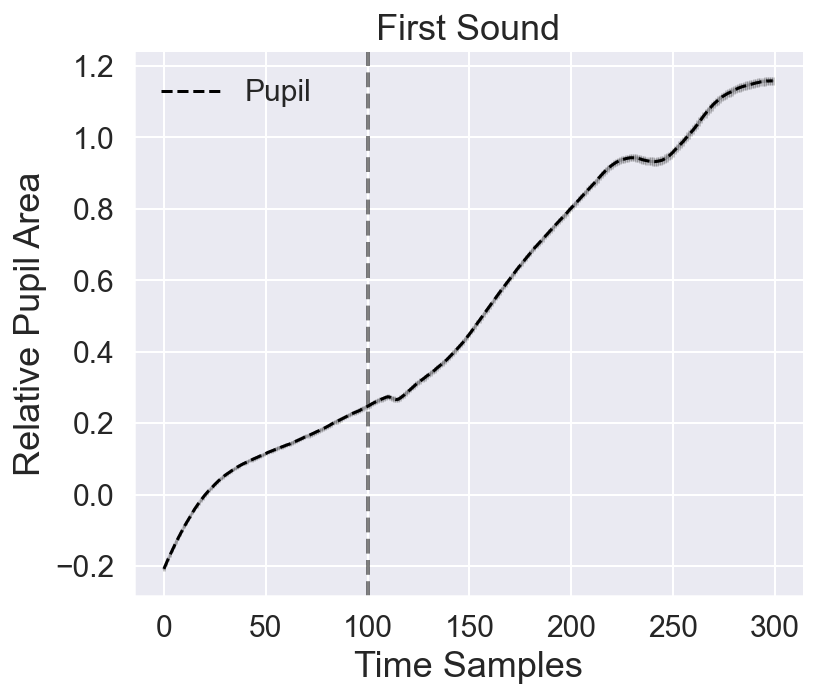

In [61]:
show_raw_pupil(pupilFirstSnd,100,baseP, title = 'First Sound')

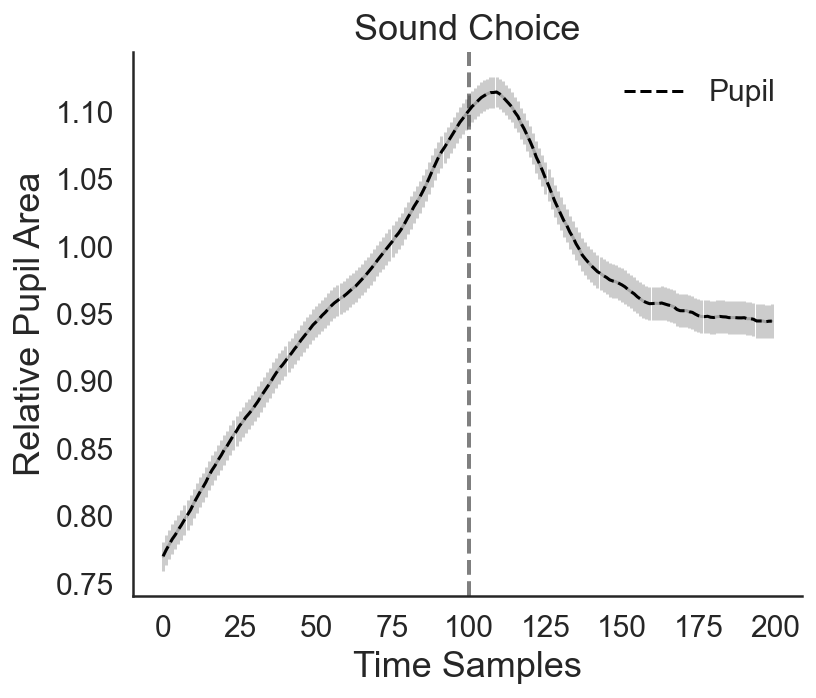

In [62]:
show_raw_pupil(pupilChoice,100,baseP, title = 'Sound Choice') # we add -10 becuase we use "feedback" event with happens 20ms after actual choice 

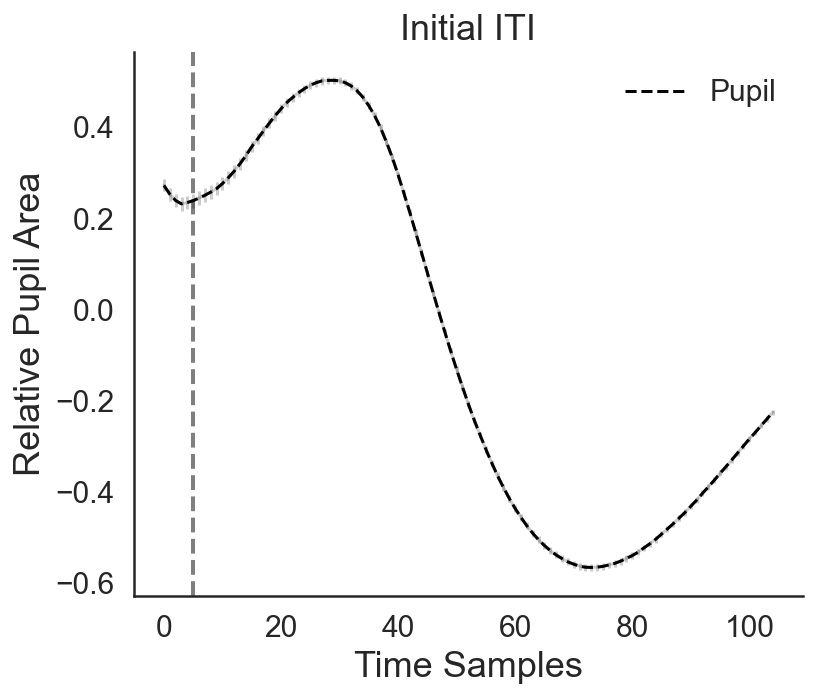

In [63]:
show_raw_pupil(pupilIti,5,baseP, title = 'Initial ITI')

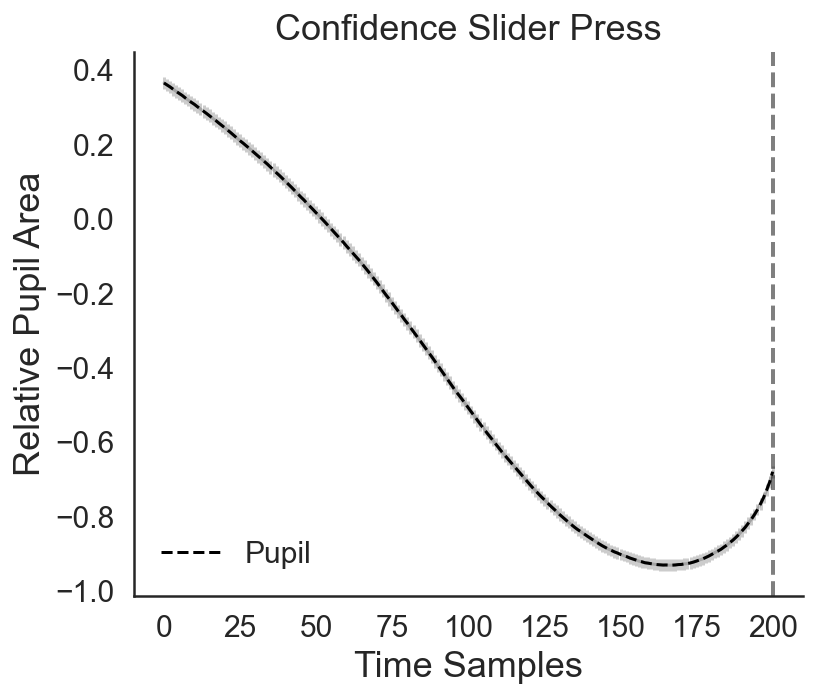

In [64]:
show_raw_pupil(pupilSlider,200,baseP, title= 'Confidence Slider Press') 

----------------------------------

# Select participants to extract the bahavioural

In [72]:
pupilInfo.RECORDING_SESSION_LABEL.unique()

array(['P33x2', 'Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot15',
       'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20', 'Pilot21', 'Pilot22',
       'Pilot23', 'Pilot24', 'Pilot25', 'Pilot27', 'Pilot29', 'Pilot30',
       'Pilot31', 'Pilot32', 'Pilot34', 'Pilot35', 'Pilot36', 'Pilot37',
       'Pilot38', 'Pilot39', 'Pilot4', 'Pilot40', 'Pilot41', 'Pilot5',
       'Pilot8', 'Pilot9'], dtype=object)

In [73]:
numPartRecover = []
for i1 in pupilInfo.RECORDING_SESSION_LABEL.unique():
    i1 = i1.replace('Pilot','')
    i1 = i1.replace('pilot','')
    i1 = i1.replace('P','')
    i1 = i1.replace('x2','')
    numPartRecover.append(int(i1))
    

In [74]:
numPartRecover

[33,
 10,
 11,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 4,
 40,
 41,
 5,
 8,
 9]

# 4.  Include Behavioural data

# Load choice info

In [77]:
len(choiceNameFrames)

32

In [ ]:
# Select participants accepted from Behavioural analysis

choiceNameFrames = list()

for i in np.arange(len(numPartRecover)):
    choiceNameFrames1 = glob.glob('/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot'+str(numPartRecover[i])+'/RESULTS_FILE.txt')
    
    choiceNameFrames1.sort()
    
    choiceNameFrames.extend(choiceNameFrames1)


In [76]:
choiceNameFrames

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot33/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot10/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot11/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot12/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot13/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot15/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot17/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot18/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot19/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot20/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot21/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot22/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupil

## Join dataframes 

In [81]:
choiceFrameAll

Session_Name_  Trial_Index_     expcond  trialn  noisecond  \
0            P33x2            21  Experiment     155          1   
1            P33x2            22  Experiment     150          1   
2            P33x2            23  Experiment     151          1   
3            P33x2            24  Experiment      96          1   
4            P33x2            25  Experiment     180          1   
...            ...           ...         ...     ...        ...   
5753        Pilot9           196  Experiment      25          1   
5754        Pilot9           197  Experiment       5          1   
5755        Pilot9           198  Experiment      73          1   
5756        Pilot9           199  Experiment      67          1   
5757        Pilot9           200  Experiment      76          1   

      whichfirstopt  noiseinl  noiseinr  freql  freqr  ...  whichfirstopt_1  \
0                 0         1         1      8      2  ...                0   
1                 0         1         1      7      6  ...                0   
2                 0         1         1      7      8  ...                0   
3                 0         1         1      1      7  ...                0   
4                 0         1         1     10      9  ...                0   
...             ...       ...       ...    ...    ...  ...              ...   
5753              0         1         1      3      8  ...                0   
5754              0         1         1      1      6  ...                0   
5755              0         1         1      9      1  ...                0   
5756              0         1         1      8      4  ...                0   
5757              0         1         1      9      4  ...                0   

     noiseinl_1  noiseinr_1  freql_1  freqr_1  frame_1  \
0             1           1        7        4        2   
1             1           1        7        4        2   
2             1           1        7        4        2   
3             1           1        7        4        2   
4             1           1        7        4        2   
...         ...         ...      ...      ...      ...   
5753          1           1        7        4        2   
5754          1           1        7        4        2   
5755          1           1        7        4        2   
5756          1           1        7        4        2   
5757          1           1        7        4        2   

                             itm_1                           itm  key_pract  \
0     SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L08_R02.wav          m   
1     SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L07_R06.wav          m   
2     SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L07_R08.wav          m   
3     SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L01_R07.wav          m   
4     SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L10_R09.wav          m   
...                            ...                           ...        ...   
5753  SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L03_R08.wav          m   
5754  SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L01_R06.wav          m   
5755  SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L09_R01.wav          m   
5756  SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L08_R04.wav          m   
5757  SimClick_Noise_1_L07_R04.wav  SimClick_Noise_1_L09_R04.wav          m   

     part  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
5753   31  
5754   31  
5755   31  
5756   31  
5757   31  

[5758 rows x 32 columns]

In [79]:
partic_num=len(choiceNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameAll = pd.DataFrame( )

for j in range (partic_num):
    choiceFrames = pd.read_csv(choiceNameFrames[j],delim_whitespace=True) 

    # add participant name column
    partNamesChoice = [int(j)]*len(choiceFrames)
    #sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    choiceFrames['part'] = partNamesChoice 
    
    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)


In [80]:
choiceNameFrames

['/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot33/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot10/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot11/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot12/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot13/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot15/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot17/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot18/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot19/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot20/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot21/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupilPEB2021/Full/pilot22/RESULTS_FILE.txt',
 '/Volumes/BdMLab2021/Prady_backup/pupil

## Normalize (z-score) values

In [102]:
choiceFrameAll["zRT"] = z_score1(choiceFrameAll,'part',"Choice_SND1_RT")
choiceFrameAll["zConf"] = z_score1(choiceFrameAll,'part',"CONF")

choiceFrameAll["zLFreq"] = z_score1(choiceFrameAll,'part',"freql")
choiceFrameAll["zRFreq"] = z_score1(choiceFrameAll,'part',"freqr")

choiceFrameAll["Choice"] = (choiceFrameAll['Choice_SND1'] == 'm')*1 + (choiceFrameAll['Choice_SND1'] == 'z')*0

## Include new variables

In [103]:
choiceFrameAll["totFreq"] = choiceFrameAll['freql'] + choiceFrameAll['freqr'] 
choiceFrameAll["dFreq"] =  - choiceFrameAll['freql'] +  choiceFrameAll['freqr'] 
choiceFrameAll["absDFreq"] =  np.abs(- choiceFrameAll['freql'] +  choiceFrameAll['freqr'] )

choiceFrameAll["zTotFreq"] = z_score1(choiceFrameAll,'part',"totFreq")
choiceFrameAll["zDFreq"] = z_score1(choiceFrameAll,'part',"dFreq")
choiceFrameAll["zAbsDFreq"] = z_score1(choiceFrameAll,'part',"absDFreq")


choiceFrameAll["choFreq"] =  ((choiceFrameAll["Choice"] == 0) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 1) *choiceFrameAll['freqr'] )
choiceFrameAll["unchoFreq"] =  ((choiceFrameAll["Choice"] == 1) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 0) *choiceFrameAll['freqr'] )

choiceFrameAll["zChoFreq"] = z_score1(choiceFrameAll,'part',"choFreq")
choiceFrameAll["zUnchoFreq"] = z_score1(choiceFrameAll,'part',"unchoFreq")

## split data : by confidence

In [104]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['ConfSplit'],Splits_variables = ['zConf'])
choiceFrameAll['ConfSplit'] = data_splits['ConfSplit'].values

## split data : by Totfreq and DFreq

In [105]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['TotFreqSplit'],Splits_variables = ['zTotFreq'])
choiceFrameAll['TotFreqSplit'] = data_splits['TotFreqSplit'].values

data_splits = splitBy(choiceFrameAll, Splits_headers = ['DFreqSplit'],Splits_variables = ['zAbsDFreq'])
choiceFrameAll['DFreqSplit'] = data_splits['DFreqSplit'].values

data_splits = splitBy(choiceFrameAll, Splits_headers = ['ChoFreqSplit'],Splits_variables = ['zChoFreq'])
choiceFrameAll['ChoFreqSplit'] = data_splits['ChoFreqSplit'].values


In [106]:
choiceFrameAll

Session_Name_  Trial_Index_     expcond  trialn  noisecond  \
0            P33x2            21  Experiment     155          1   
1            P33x2            22  Experiment     150          1   
2            P33x2            23  Experiment     151          1   
3            P33x2            24  Experiment      96          1   
4            P33x2            25  Experiment     180          1   
...            ...           ...         ...     ...        ...   
5753        Pilot9           196  Experiment      25          1   
5754        Pilot9           197  Experiment       5          1   
5755        Pilot9           198  Experiment      73          1   
5756        Pilot9           199  Experiment      67          1   
5757        Pilot9           200  Experiment      76          1   

      whichfirstopt  noiseinl  noiseinr  freql  freqr  ...    zDFreq  \
0                 0         1         1      8      2  ... -1.401298   
1                 0         1         1      7      6  ... -0.233550   
2                 0         1         1      7      8  ...  0.233550   
3                 0         1         1      1      7  ...  1.401298   
4                 0         1         1     10      9  ... -0.233550   
...             ...       ...       ...    ...    ...  ...       ...   
5753              0         1         1      3      8  ...  1.167748   
5754              0         1         1      1      6  ...  1.167748   
5755              0         1         1      9      1  ... -1.868397   
5756              0         1         1      8      4  ... -0.934199   
5757              0         1         1      9      4  ... -1.167748   

     zAbsDFreq  choFreq  unchoFreq  zChoFreq  zUnchoFreq ConfSplit  \
0     1.055290        8          2  0.941502   -1.263450       0.0   
1    -1.206045        6          7  0.235376    0.459436       0.0   
2    -1.206045        7          8  0.588439    0.804014       0.0   
3     1.055290        1          7 -1.529941    0.459436       1.0   
4    -1.206045       10          9  1.647629    1.148591       1.0   
...        ...      ...        ...       ...         ...       ...   
5753  0.603023        8          3  0.912374   -0.911144       0.0   
5754  0.603023        1          6 -1.528372    0.133480       1.0   
5755  1.959824        9          1  1.261053   -1.607561       0.0   
5756  0.150756        8          4  0.912374   -0.562936       0.0   
5757  0.603023        9          4  1.261053   -0.562936       1.0   

      TotFreqSplit  DFreqSplit ChoFreqSplit  
0              0.0         1.0          1.0  
1              1.0         0.0          1.0  
2              1.0         0.0          1.0  
3              0.0         1.0          0.0  
4              1.0         0.0          1.0  
...            ...         ...          ...  
5753           1.0         1.0          1.0  
5754           0.0         1.0          0.0  
5755           0.0         1.0          1.0  
5756           1.0         1.0          1.0  
5757           1.0         1.0          1.0  

[5758 rows x 51 columns]

In [107]:
#data_expHigh = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] # 1 = high, 2 = low
#data_expLow = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] # 1 = high, 2 = low

# Pick for confidence levels across both frames
data_expHigh = choiceFrameAll.loc[(choiceFrameAll['ConfSplit'] == 1)] 
data_expLow = choiceFrameAll.loc[(choiceFrameAll['ConfSplit'] == 0)] 

 # extract relevant participants for pupil info

In [108]:
kept_part = choiceFrameAll.Session_Name_.unique()

In [109]:
pupiInfoBehav = []
for j in kept_part:
    indexDFPart = indexDF.loc[(indexDF['part'] ==  j)].copy()
    pupiInfoBehav.extend(indexDFPart.values.tolist())
    
pupiIdxBehav = pd.DataFrame(pupiInfoBehav, columns=indexDF.columns)

In [110]:
pupiIdxBehav

part  trial  firstSndIdx  choiceIdx   itiIdx  confAcceptIdx  \
0      P33x2     21          207        549        7           1037   
1      P33x2     22         1249       1515     1048           1955   
2      P33x2     23         2166       2312     1966           2706   
3      P33x2     24         2917       3052     2717           3588   
4      P33x2     25         3798       3973     3598           4566   
...      ...    ...          ...        ...      ...            ...   
5753  Pilot9    196      5484773    5484991  5484572        5485448   
5754  Pilot9    197      5485659    5485988  5485458        5486432   
5755  Pilot9    198      5486644    5486872  5486444        5487325   
5756  Pilot9    199      5487537    5487742  5487337        5488201   
5757  Pilot9    200      5488414    5488659  5488214        5489083   

      confBeginIdx  basePupil  
0              850  -0.223676  
1             1817  -0.593569  
2             2614  -0.619462  
3             3353  -0.306275  
4             4275   0.506195  
...            ...        ...  
5753       5485292  -0.679902  
5754       5486290  -0.084433  
5755       5487174   0.329622  
5756       5488044  -0.689592  
5757       5488960  -0.182011  

[5758 rows x 8 columns]

In [113]:
np.unique(pupiIdxBehav.part)

array(['P33x2', 'Pilot10', 'Pilot11', 'Pilot12', 'Pilot13', 'Pilot15',
       'Pilot17', 'Pilot18', 'Pilot19', 'Pilot20', 'Pilot21', 'Pilot22',
       'Pilot23', 'Pilot24', 'Pilot25', 'Pilot27', 'Pilot29', 'Pilot30',
       'Pilot31', 'Pilot32', 'Pilot34', 'Pilot35', 'Pilot36', 'Pilot37',
       'Pilot38', 'Pilot39', 'Pilot4', 'Pilot40', 'Pilot41', 'Pilot5',
       'Pilot8', 'Pilot9'], dtype=object)

In [116]:
pupilBaseline = []
for i in pupiIdxBehav['firstSndIdx'].values.astype(int):
    pupilBaseline.append(pupilInfo.iloc[i-200:i-1].zPupil.values) # extract 2 seconds prior to the appearance of the sound

    
basePBehav = [None]*len(pupilBaseline)
for j in range(len(pupilBaseline)):
    pupilSeq1S = [None]*len(pupilBaseline[j])
    for jj in range(len(pupilBaseline[j])):
        if pupilBaseline[j][jj]=='':
            pupilSeq1S[jj]=np.nan
        else:
            pupilSeq1S[jj] = float(pupilBaseline[j][jj])
    basePBehav[j] = np.nanmean(pupilSeq1S) # baseP contains the value of pupil for the baseline of each trial
pupiIdxBehav['basePupil'] = basePBehav

remember that the sampling time was 100hz, so we have 10ms between samples

In [117]:
pupilFirstSnd = []
pupilChoice = []
pupilIti = []
pupilSlider = []

for i in pupiIdxBehav['firstSndIdx'].values.astype(int):
    pupilFirstSnd.append(pupilInfo.iloc[i-100:i+100].zPupil.values)
    
for i in pupiIdxBehav['choiceIdx'].values.astype(int):
    pupilChoice.append(pupilInfo.iloc[i-100:i+100].zPupil.values)
    
for i in pupiIdxBehav['itiIdx'].values.astype(int):
    pupilIti.append(pupilInfo.iloc[i-10:i+100].zPupil.values)    

for i in pupiIdxBehav['confAcceptIdx'].values.astype(int):
    pupilSlider.append(pupilInfo.iloc[i-200:i+1].zPupil.values)    # if increase more than 10 you can start reading outside the list 
    

In [118]:
def show_raw_pupil_split(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "",labFrame = ['High','Low']
):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    data_expHigh = choiceFrameAll.loc[(choiceFrameAll[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll.loc[(choiceFrameAll[splitVar] == 0)] #
    
#    index_high = data_expHigh.TRIAL_N_LIVE.values-1
#    index_low = data_expLow.TRIAL_N_LIVE.values-1

    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values

    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    #baseTimeStd1 =np.nanstd(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')

    figsize(6, 5)
    
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    #baseTimeStd2 =np.nanstd(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')

    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#5BC8AF','#F9CB40','#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    plt.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.05 );
    plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-')
    #plot low    
    plt.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[1],marker='', alpha = 0.05 );
    plot(xSecs,baseTimeMean2,color=colorP[1],label = labFrame[1],ls = '-')
    
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    plt.title(title,size=18)
    plt.xlabel("Time Samples [ms]",size=18)
    plt.ylabel("Relative Pupil Area",size=18)
    # since we have 500 hz samples (i.e. the distance between each sample is 2ms) we multiple by 2 the interval
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*2),int(-event_time/2*2) ,0, int(event_time/2*2),int((len(xSecs)-event_time)*2) ],fontsize= 15)
    
    
    plt.yticks(fontsize= 15)
    
    
    plt.legend(frameon=False, fontsize = 15)
    sns.set_style("white")
    sns.despine()

In [119]:
len(pupilFirstSnd)

5758

In [120]:
len(basePBehav)

5758

In [121]:
len(choiceFrameAll)

5758

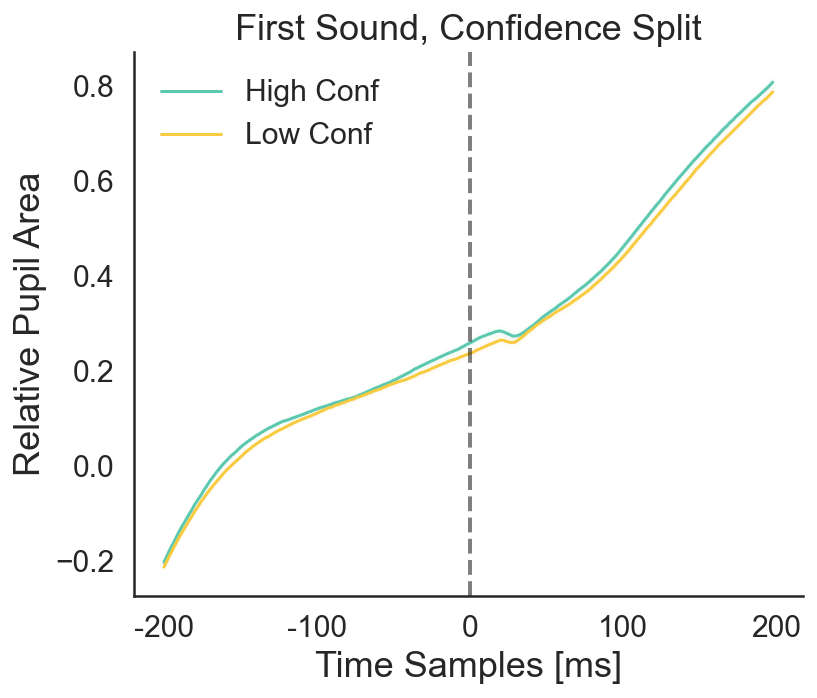

In [122]:
show_raw_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'First Sound, Confidence Split',labFrame = ['High Conf','Low Conf'])

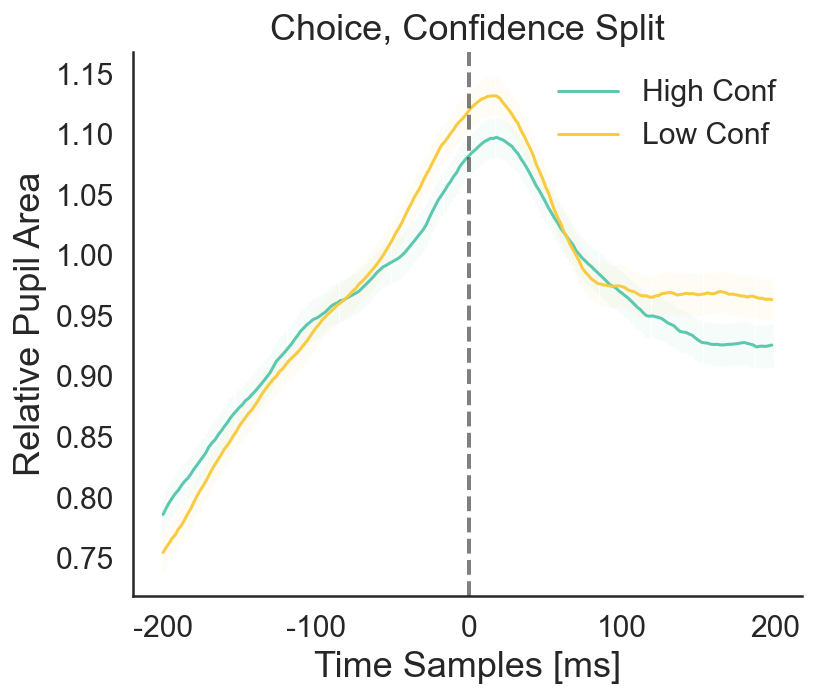

In [123]:
show_raw_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'Choice, Confidence Split',labFrame = ['High Conf','Low Conf'])

# Checking relative change in pupil size separating by frame

# Separate by frame

In [124]:

def show_frame_pupil_split(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "", labFrame = ['High','Low']):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    
    # initialize figure
    
    figsize(12, 5)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    #############################################
    ### Pick for the data for the FIRST FRAME ###
    #############################################
    
    choiceFrameAll0 = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
    
    
    data_expHigh = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 0)] #
    
    
    # with this we pick always the index only for the first part
    #index_high = data_expHigh.TRIAL_N_LIVE.values-1
    #index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values

    
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    ax1.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.5 );
    ax1.plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-',linewidth=3.5)
    #plot low    
    ax1.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[2],marker='', alpha = 0.5 );
    ax1.plot(xSecs,baseTimeMean2,color=colorP[2],label = labFrame[1],ls = '-',linewidth=3.5)
    
    ax1.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    ax1.set(xlabel = "Time Samples [ms]",ylabel = "Relative Pupil Area")

    
    
    sample_factor = 10
    
    plt.sca(ax1)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    ax1.yaxis.label.set_size(15)
    ax1.xaxis.label.set_size(15)
   
    ax1.legend(frameon=False, fontsize = 15)
    ax1.set_title("High Clicks Frame", fontsize = 18)
    ##############################################
    ### Pick for the data for the SECOND FRAME ###
    ##############################################
    
    choiceFrameAll0 = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 
    
    data_expHigh = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 0)] #
    
    #index_high = data_expHigh.TRIAL_N_LIVE.values-1
    #index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    index_high = data_expHigh.index.values
    index_low = data_expLow.index.values
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =scipy.stats.sem(base1, axis= 0,nan_policy='omit')
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S - baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =scipy.stats.sem(base2, axis= 0,nan_policy='omit')
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    ax2.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[1],marker='', alpha = 0.5 );
    ax2.plot(xSecs,baseTimeMean1,color=colorP[1],label = labFrame[0],ls = '-',linewidth=3.5)
    ax2.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[3],marker='', alpha = 0.5 );
    ax2.plot(xSecs,baseTimeMean2,color=colorP[3],label = labFrame[1],ls = '-',linewidth=3.5)
    
    ax2.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    ax2.set(xlabel = "Time Samples [ms]")

    
    
    plt.sca(ax2)    
    plt.xticks([0, event_time/2 ,event_time,event_time*3/2,len(xSecs)], [
        int(-event_time*sample_factor),int(-event_time/2*sample_factor) ,0, int(event_time/2*sample_factor),int((len(xSecs)-event_time)*sample_factor) ],fontsize= 15)
    plt.yticks(fontsize= 15)
    ax2.legend(frameon=False, fontsize = 15)
    ax2.set_title("Low Clicks Frame",fontsize = 18)
    ax2.xaxis.label.set_size(15)

    
    
    
    
    plt.suptitle(title,size=18)

    sns.set_style("white")
    sns.despine()


## split by TotFreq 

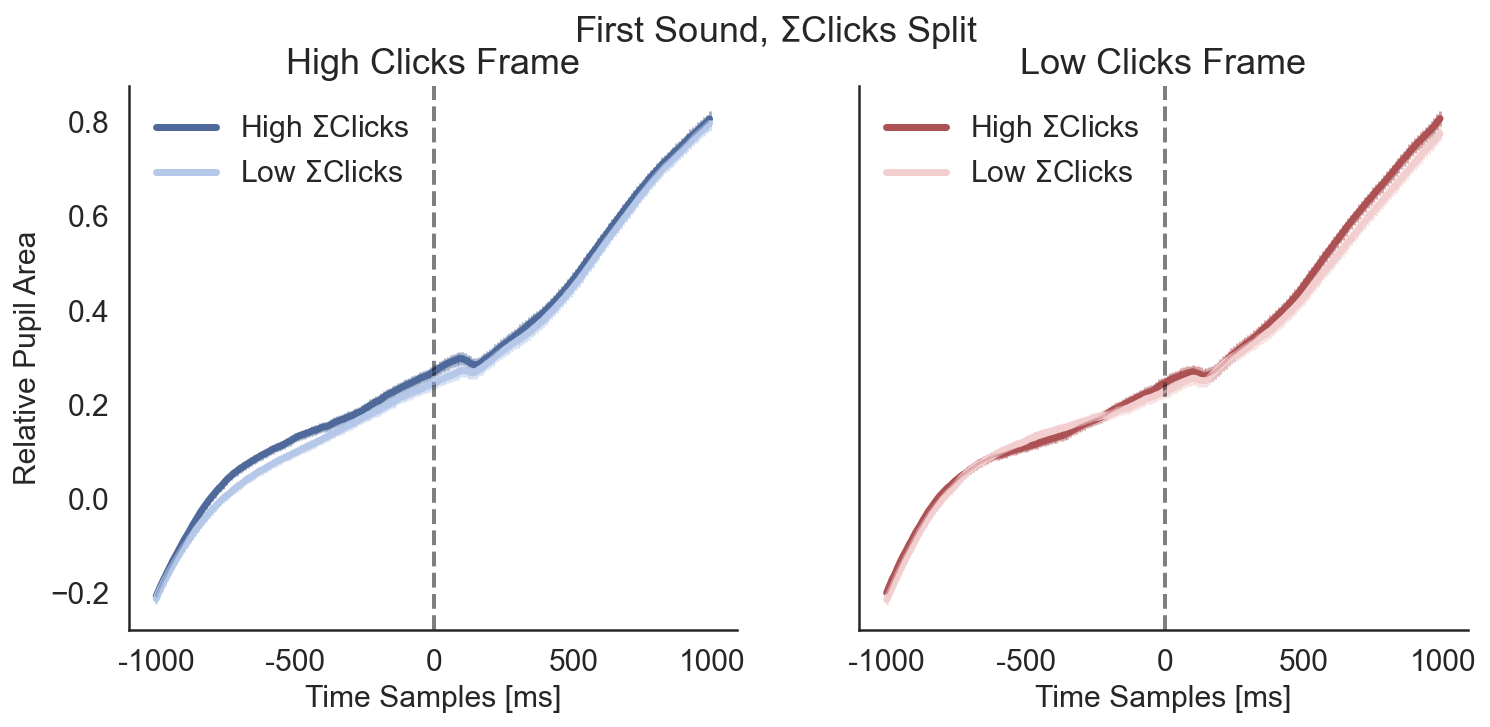

In [125]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'First Sound, $\Sigma$Clicks Split', labFrame = ['High $\Sigma$Clicks','Low $\Sigma$Clicks'])

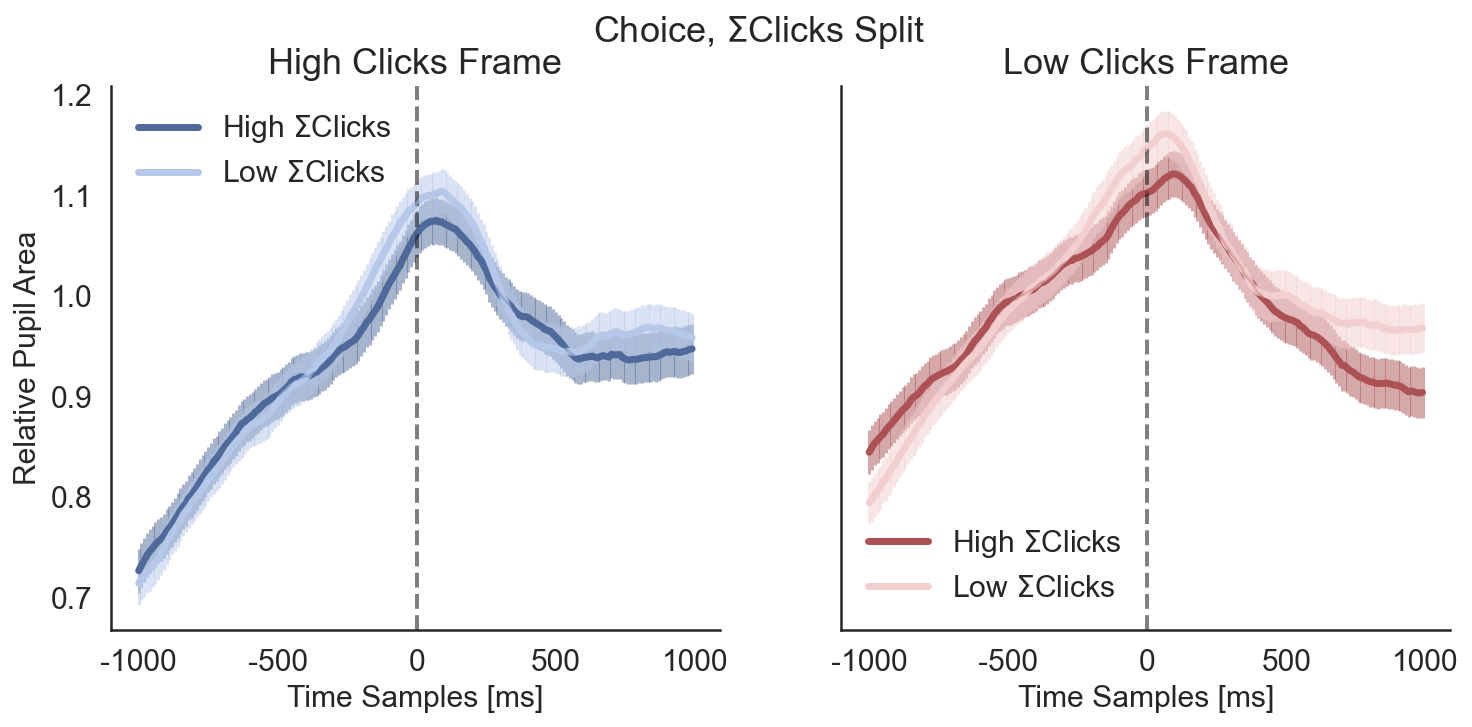

In [126]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'TotFreqSplit',title = 'Choice, $\Sigma$Clicks Split', labFrame = ['High $\Sigma$Clicks','Low $\Sigma$Clicks'])


## split by Confidence 

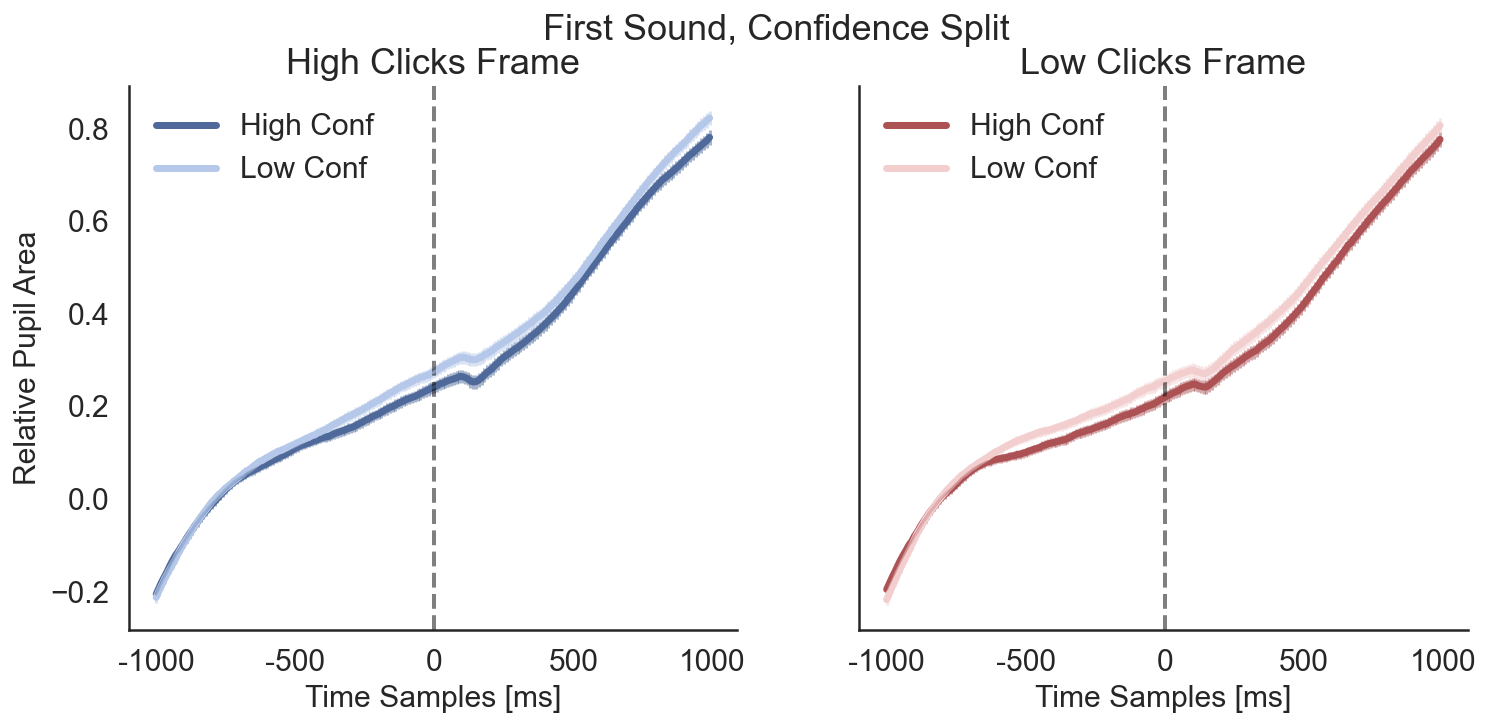

In [127]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'ConfSplit',title = 'First Sound, Confidence Split', labFrame = ['High Conf','Low Conf'])

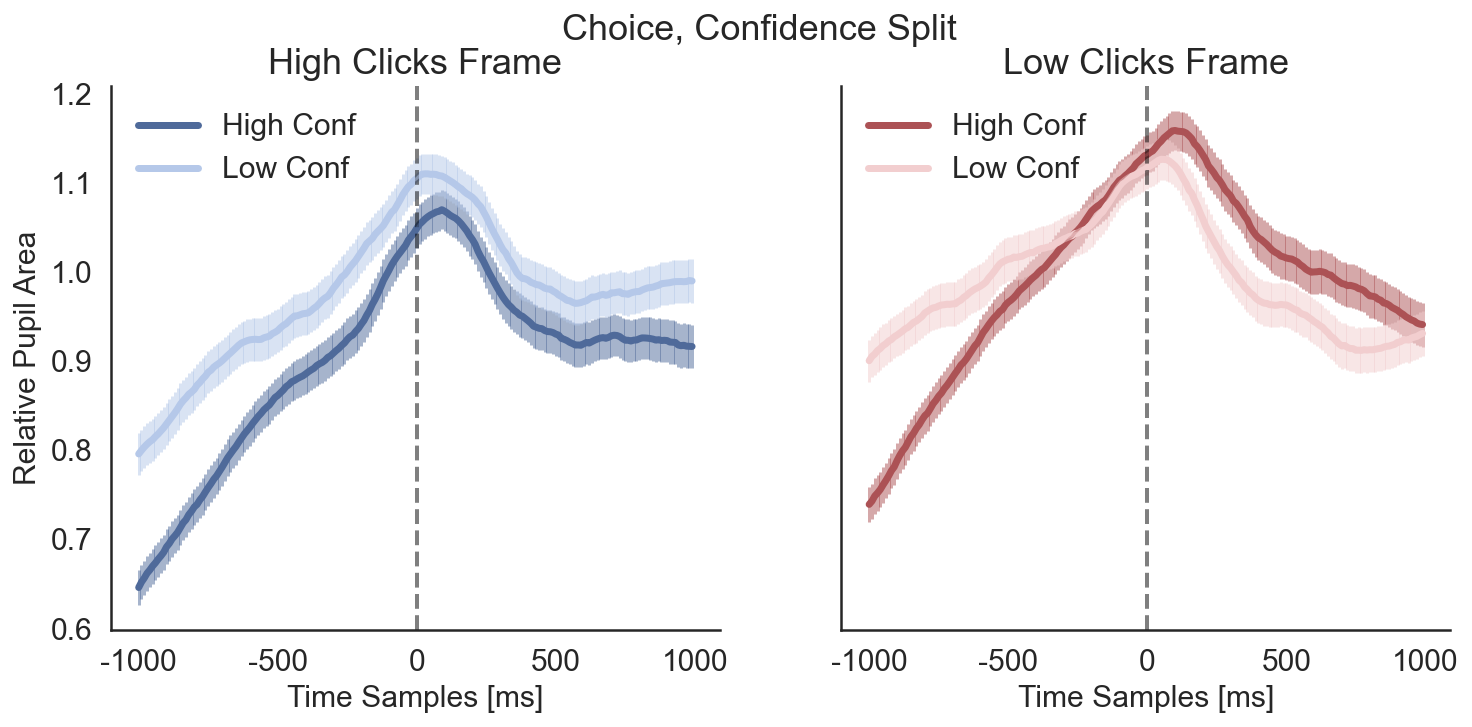

In [128]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'ConfSplit',title = 'Choice, Confidence Split', labFrame = ['High Conf','Low Conf'])


## split by DFreq 

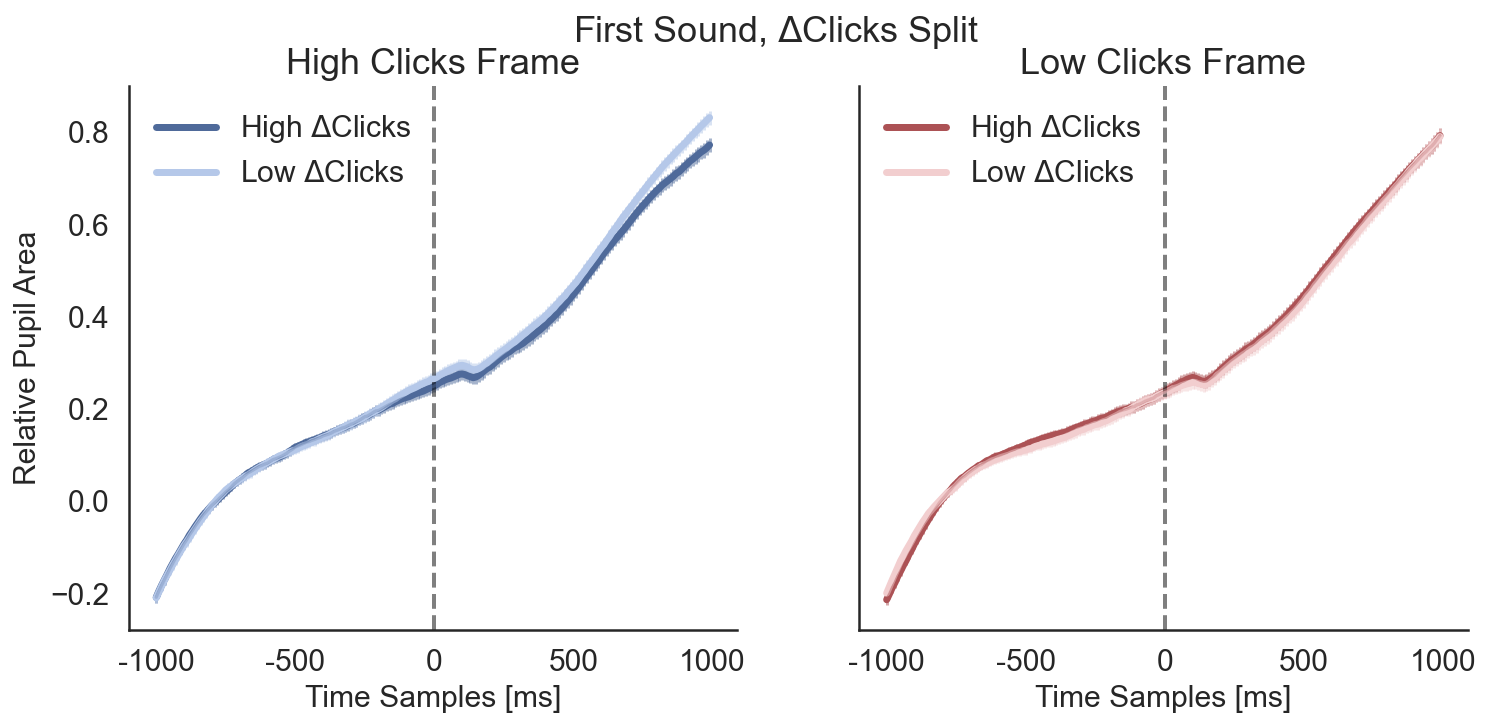

In [129]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'DFreqSplit',title = 'First Sound, $\Delta$Clicks Split', labFrame = ['High $\Delta$Clicks','Low $\Delta$Clicks'])

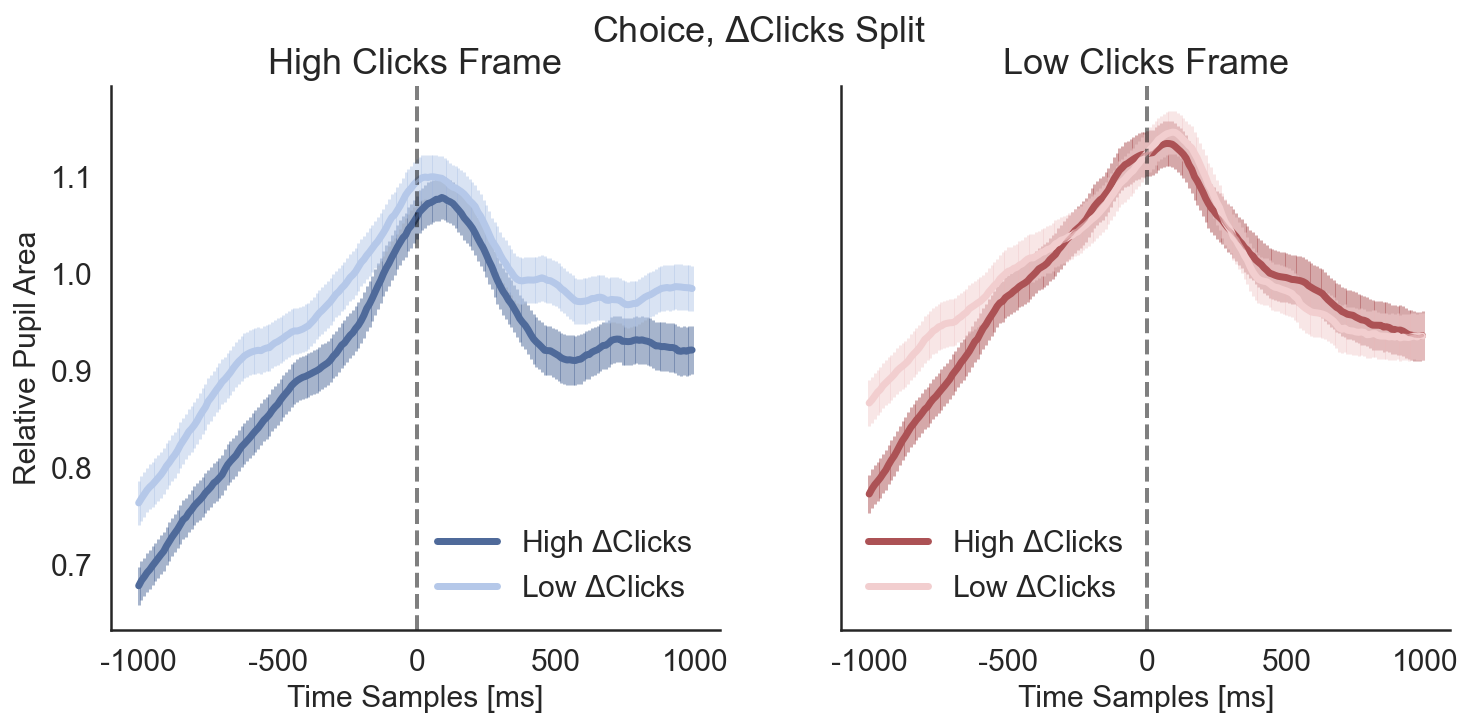

In [130]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'DFreqSplit',title = 'Choice, $\Delta$Clicks Split', labFrame = ['High $\Delta$Clicks','Low $\Delta$Clicks'])


# split by Chosen Clicks


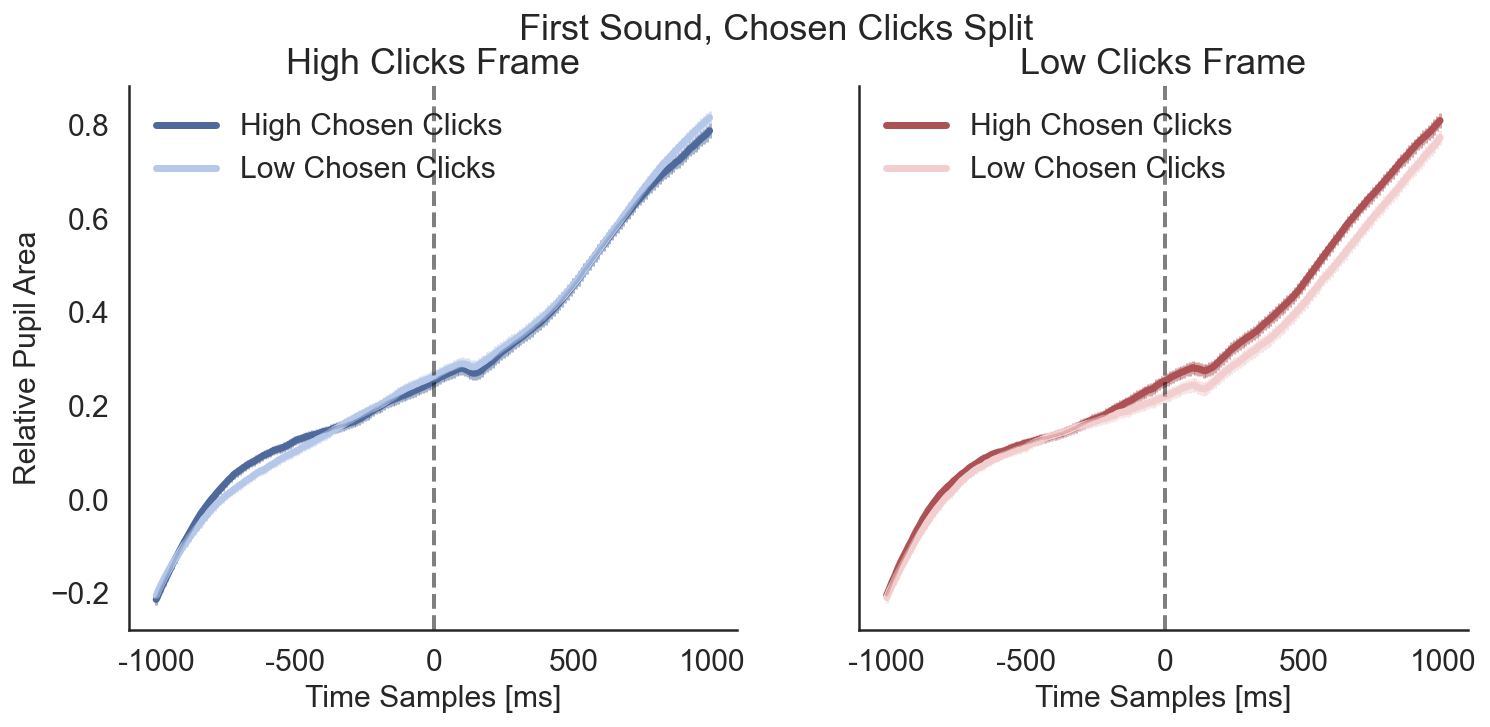

In [131]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'ChoFreqSplit',title = 'First Sound, Chosen Clicks Split', labFrame = ['High Chosen Clicks','Low Chosen Clicks'])

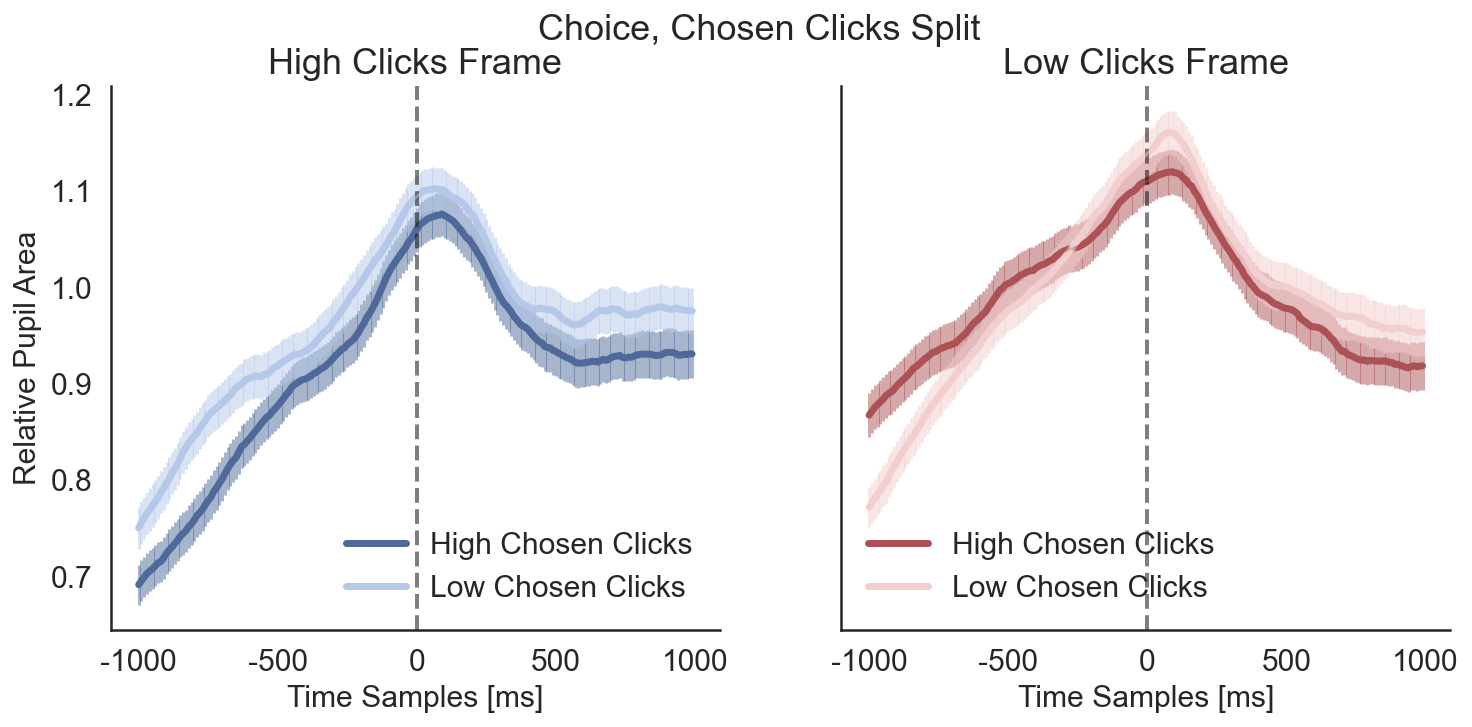

In [132]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'ChoFreqSplit',title = 'Choice, Chosen Clicks Split', labFrame = ['High Chosen Clicks','Low Chosen Clicks'])


# Separate correct from incorrect trials

In [133]:
Correct = []
for i in range(len(choiceFrameAll)):
    if choiceFrameAll.frame[i] == 1:
        if (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
            
        else:
            Correct.append(0)
    if choiceFrameAll.frame[i] == 2:
        if (choiceFrameAll.Choice[i] == 0 and (choiceFrameAll.zLFreq[i] <= choiceFrameAll.zRFreq[i])) or (choiceFrameAll.Choice[i] == 1 and (choiceFrameAll.zLFreq[i] >= choiceFrameAll.zRFreq[i])):
            Correct.append(1)
        else:
            Correct.append(0)

choiceFrameAll["correct"] = Correct

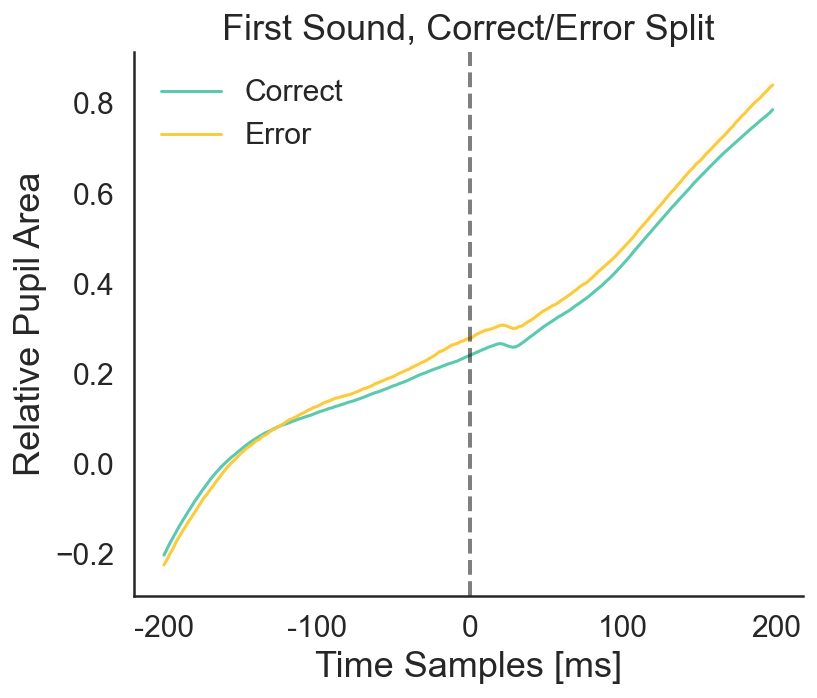

In [134]:
show_raw_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'correct',title = 'First Sound, Correct/Error Split',labFrame = ['Correct','Error'])

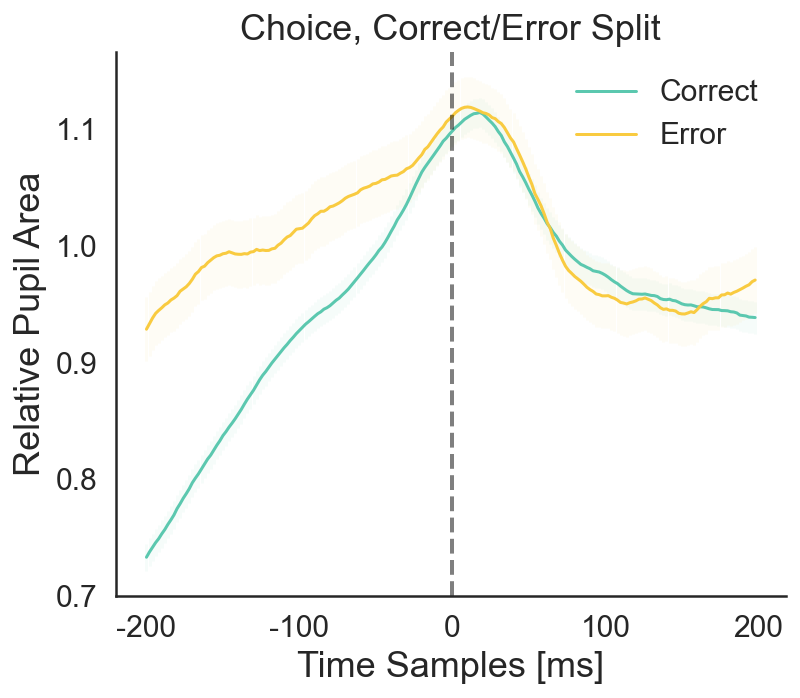

In [135]:
show_raw_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'correct',title = 'Choice, Correct/Error Split',labFrame = ['Correct','Error'])

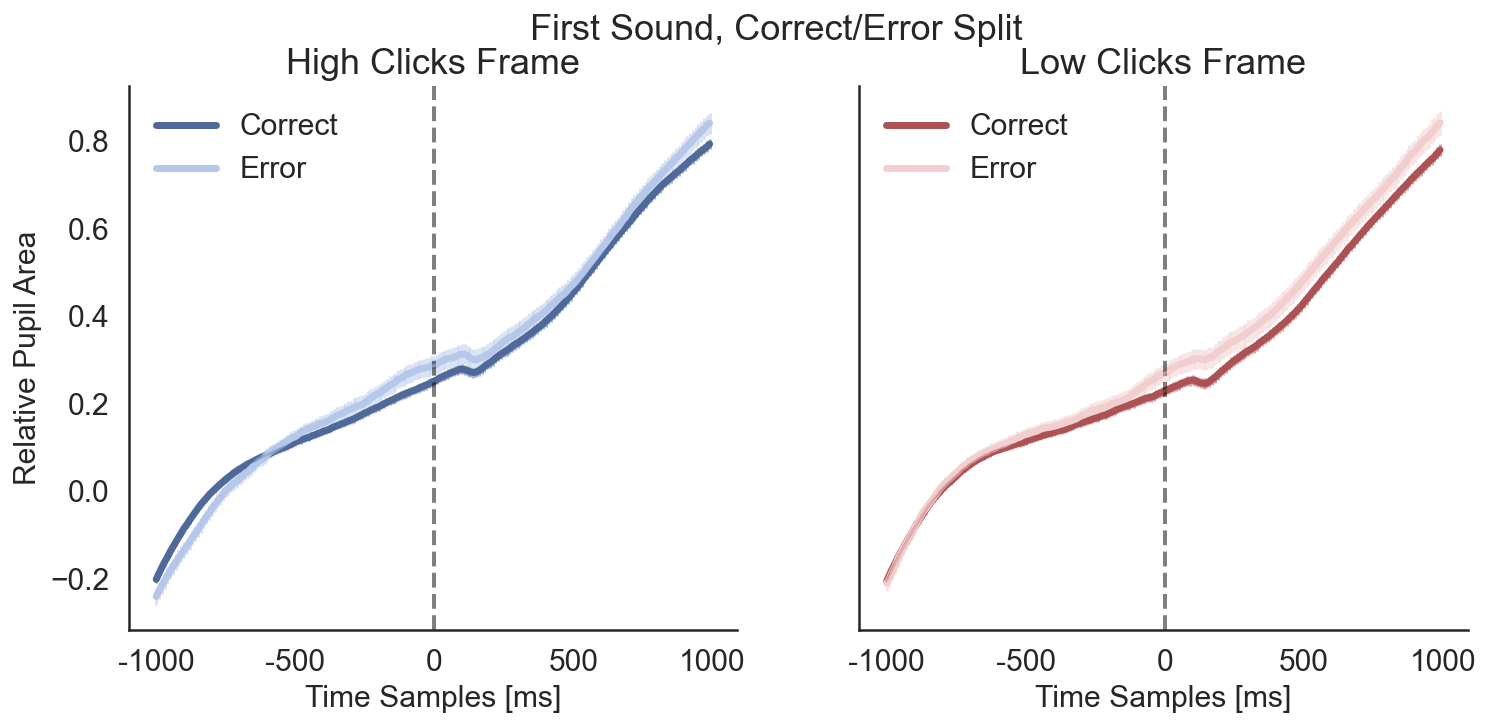

In [136]:
show_frame_pupil_split(pupilFirstSnd,100,choiceFrameAll,basePBehav,'correct',title = 'First Sound, Correct/Error Split', labFrame = ['Correct','Error'])

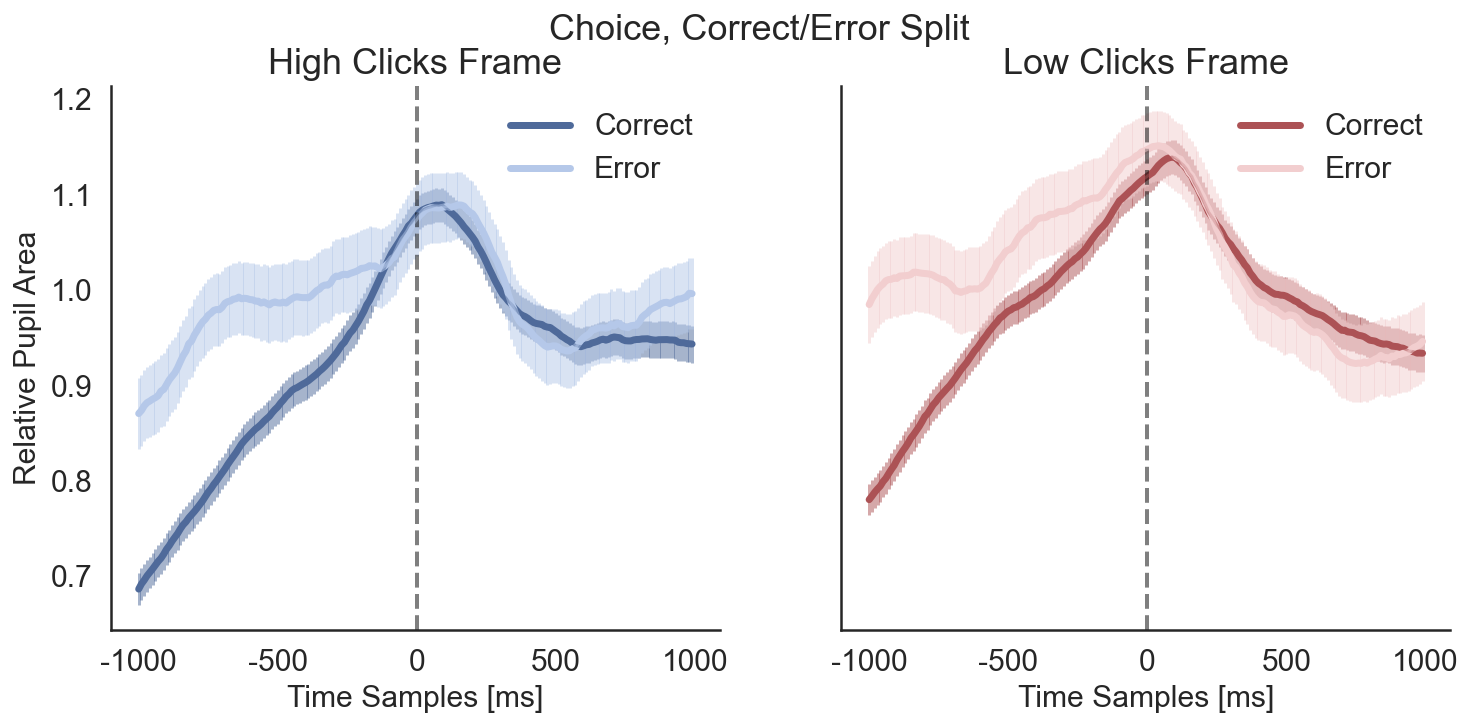

In [137]:
show_frame_pupil_split(pupilChoice,100,choiceFrameAll,basePBehav,'correct',title = 'Choice, Correct/Error Split', labFrame = ['Correct','Error'])

--------------------------------------

# 4.5 Simple GLM Predecision

In [203]:
pupMeanPreDecis = []
for i in range(len(pupilChoice)):
    pupMeanPreDecis.append(np.mean(pupilChoice[i][100:200])) # pick predecision time

In [204]:
len(pupMeanPreDecis)

5758

<AxesSubplot:>

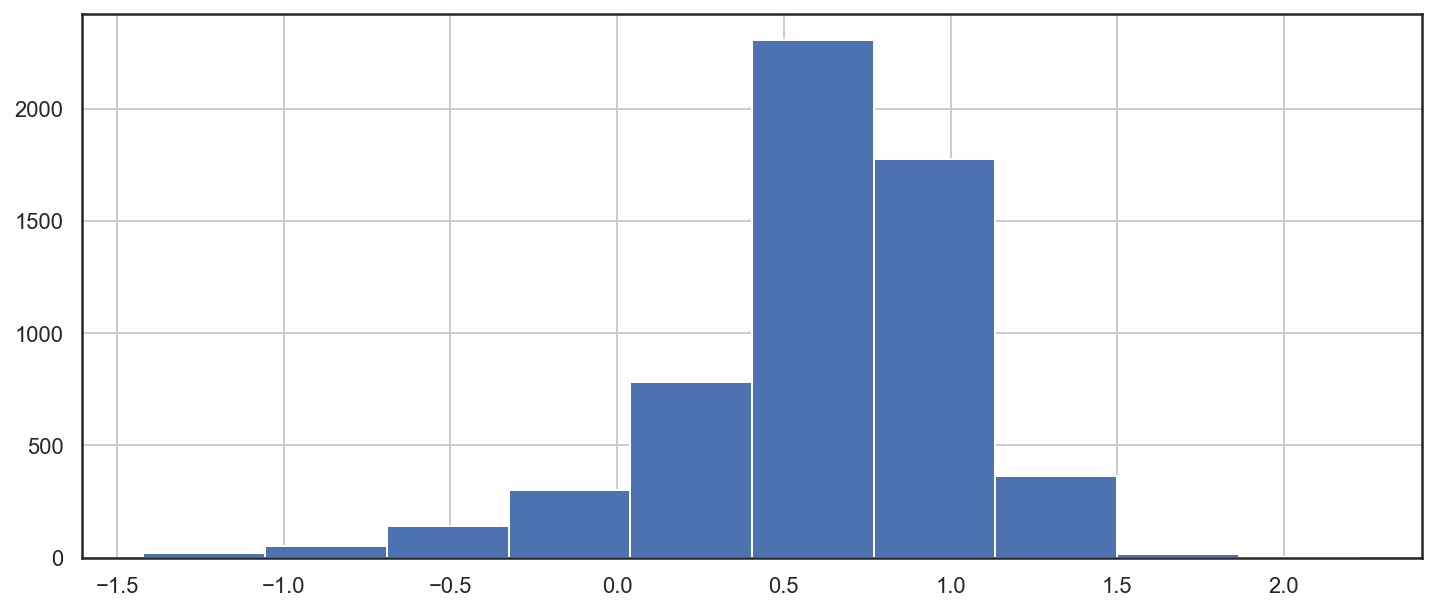

In [205]:
choiceFrameAll['pupilPreDecAvg'].hist()

In [206]:
choiceFrameAll['pupilPreDecAvg'] =  pupMeanPreDecis

In [207]:
choiceFrameAllH = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
choiceFrameAllL = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 

In [208]:
%R -i choiceFrameAllH -i choiceFrameAllL

In [211]:
%%R
ModelPupilH_1 <- glm(pupilPreDecAvg ~ correct+ zConf + zAbsDFreq + zTotFreq , data=choiceFrameAllH)
ModelPupilL_1 <- glm(pupilPreDecAvg ~ correct + zConf + zAbsDFreq + zTotFreq, data=choiceFrameAllL)


Call:
glm(formula = pupilPreDecAvg ~ correct + zConf + zAbsDFreq + 
    zTotFreq, data = choiceFrameAllH)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.61763  -0.23115   0.07883   0.31594   1.39189  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.591323   0.022355  26.451  < 2e-16 ***
correct      0.052477   0.025273   2.076   0.0379 *  
zConf        0.045392   0.010151   4.472 8.06e-06 ***
zAbsDFreq   -0.014773   0.010022  -1.474   0.1406    
zTotFreq    -0.004971   0.009320  -0.533   0.5938    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2445326)

    Null deviance: 710.52  on 2879  degrees of freedom
Residual deviance: 703.03  on 2875  degrees of freedom
AIC: 4123.9

Number of Fisher Scoring iterations: 2


Call:
glm(formula = pupilPreDecAvg ~ correct + zConf + zAbsDFreq + 
    zTotFreq, data = choiceFrameAllL)

Deviance Residuals: 
    

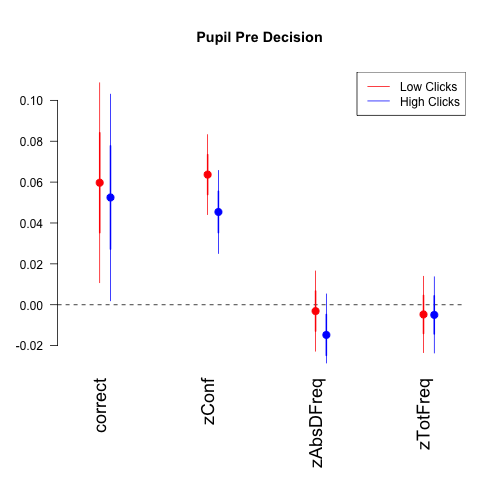

In [212]:
%%R
title_plot = "Pupil Pre Decision "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

# 5. GLM model on pupil

## Pick trials course --  select between pupil info between ITI_APPEAR (moment beginning trial) and  CHOICE_FEEDBACK_TIMER (moment confidence screen will appear)

## canonical pupil response function (as used in Lempert et al., 2015; de Gee et al., 2014)

In [220]:
t = range(300)
s = 1/10**(27)
w = 10.1
tmax = 930 #[ms]
sample_factor = 10 # 100 Hz sampling


h = []
for ti in t:
    h.append(s*(ti*sample_factor)**w*exp(-(ti*sample_factor)*w/tmax)) # we multiply by sample_factor to adjust for sampling

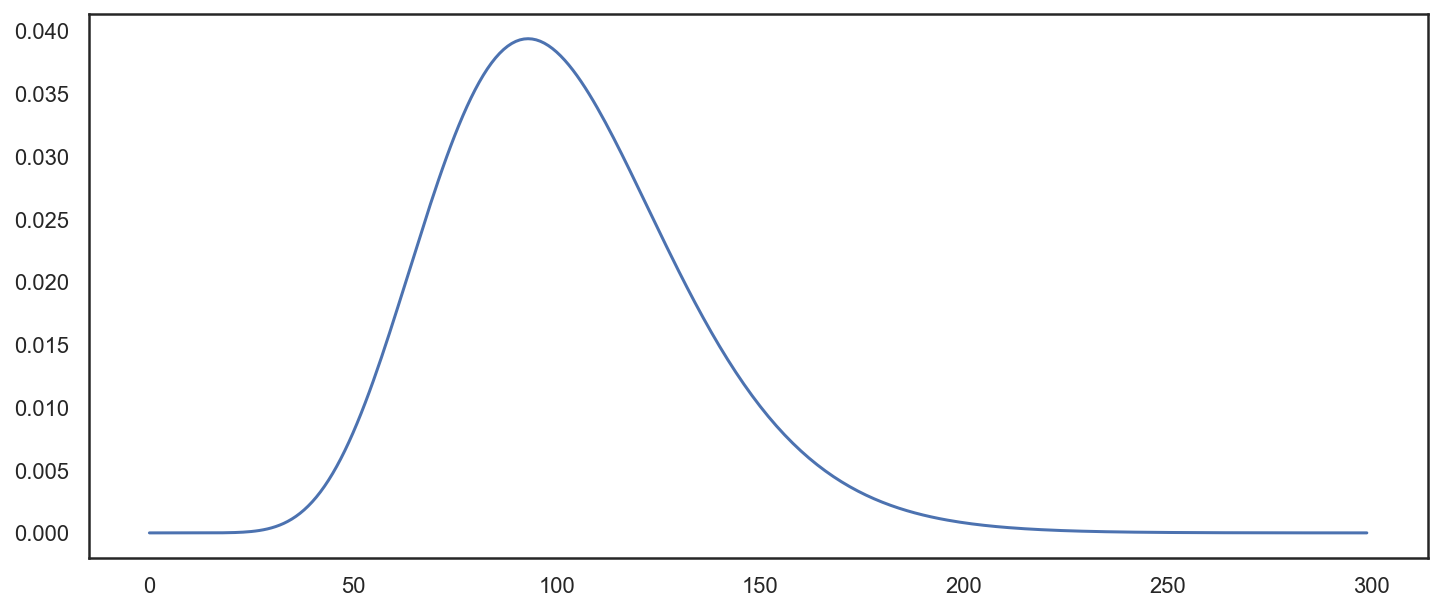

In [221]:
plt.plot(h)

# Estimate regressors , no frame separation

In [222]:
pupilTrialAll = []
devIdxTrialAll = []
# initialize regressors trials together
regSndOnsetlAll = []
regChoOnsetlAll = []
regPreDecAll = []
regPostDeclAll = []

regSndOnsetlAll_C = []
regChoOnsetlAll_C = []
regPreDecAll_C= []
regPostDeclAll_C = []

regSndOnsetlAll_D = []
regChoOnsetlAll_D = []
regPreDecAll_D = []
regPostDeclAll_D = []

beginTrialIdx = pupiIdxBehav['itiIdx'].values.astype(int)
endTrialIdx = pupiIdxBehav['confBeginIdx'].values.astype(int)

j = 0
for i in beginTrialIdx:
    
    trialPupilIter = pupilInfo.iloc[ i : endTrialIdx[j]]
    
    # define regressors:
    regSndOnset = ((trialPupilIter.SAMPLE_MESSAGE.str.contains('FIRST_SOUND_R'))*1).values # regressor for stimulus onset
    regChoiceOnset = (((trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_R')) | (trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_L')))*1).values # regressor for choice onset

    
    
    # boxcar regressor pre-decision
    reg0 = np.zeros(len(regSndOnset))
    reg0Begin = np.where(regSndOnset == 1)[0][0] # from the sound presentation
    reg0End = np.where(regChoiceOnset == 1)[0][0] # to the choice
    
    regLen = len(reg0[reg0Begin:reg0End])    
    reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
    regPreDecision = reg0
    
    # boxcar regressor post-decision
    reg0 = np.zeros(len(regSndOnset))
    reg0Begin = np.where(regChoiceOnset == 1)[0][0] # from the choice
    reg0End = len(regSndOnset) # to the end of the trial
    
    regLen = len(reg0[reg0Begin:reg0End])    
    reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
    regPostDecision = reg0
 
    # add pupil data
    pupilTrialAll.extend(trialPupilIter.zPupil.values)

    # add deviation index data
    devIdxTrialAll.extend(trialPupilIter.zDevIdx.values)
    
    # calculate convolved regressors
    conRegSndOnset =  numpy.convolve(regSndOnset, h, mode='full')[0:len(regSndOnset)]
    conRegChoiceOnset = numpy.convolve(regChoiceOnset, h, mode='full')[0:len(regChoiceOnset)]
    conRegPreDecision = numpy.convolve(regPreDecision, h, mode='full')[0:len(regPreDecision)]
    conRegPostDecision = numpy.convolve(regPostDecision, h, mode='full')[0:len(regPostDecision)]
    
    # add up the regressor
    regSndOnsetlAll.extend(conRegSndOnset)
    regChoOnsetlAll.extend(conRegChoiceOnset)
    regPreDecAll.extend(conRegPreDecision)
    regPostDeclAll.extend(conRegPostDecision)
    
    
    # extract parametric modulators from behaviour.
    confParamIter = choiceFrameAll.iloc[j].zConf    
    absDFreqParamIter = choiceFrameAll.iloc[j].zAbsDFreq    
    
    # confidence modulated regressor
    regSndOnsetlAll_C.extend(conRegSndOnset*confParamIter)
    regChoOnsetlAll_C.extend(conRegChoiceOnset*confParamIter)
    regPreDecAll_C.extend(conRegPreDecision*confParamIter)
    regPostDeclAll_C.extend(conRegPostDecision*confParamIter)
    
    # difficulty modulated regressor
    regSndOnsetlAll_D.extend(conRegSndOnset*absDFreqParamIter)
    regChoOnsetlAll_D.extend(conRegChoiceOnset*absDFreqParamIter)
    regPreDecAll_D.extend(conRegPreDecision*absDFreqParamIter)
    regPostDeclAll_D.extend(conRegPostDecision*absDFreqParamIter)

    j = j + 1
    
pupilRegressModel = pd.DataFrame()   
pupilRegressModel['pupil'] = pupilTrialAll
pupilRegressModel['DevIdx'] = devIdxTrialAll
pupilRegressModel['SndOnset']=regSndOnsetlAll
pupilRegressModel['ChoOnset']=regChoOnsetlAll
pupilRegressModel['PreDecis']=regPreDecAll
pupilRegressModel['PostDecis']=regPostDeclAll
pupilRegressModel['CxSndOnset']=regSndOnsetlAll_C
pupilRegressModel['CxChoOnset']=regChoOnsetlAll_C
pupilRegressModel['CxPreDecis']=regPreDecAll_C
pupilRegressModel['CxPostDecis']=regPostDeclAll_C
pupilRegressModel['DxSndOnset']=regSndOnsetlAll_D
pupilRegressModel['DxChoOnset']=regChoOnsetlAll_D
pupilRegressModel['DxPreDecis']=regPreDecAll_D
pupilRegressModel['DxPostDecis']=regPostDeclAll_D

In [223]:
pupilRegressModel

pupil    DevIdx  SndOnset  ChoOnset      PreDecis  PostDecis  \
0        0.508379  0.087915       0.0  0.000000  0.000000e+00   0.000000   
1        0.533712  0.064633       0.0  0.000000  0.000000e+00   0.000000   
2        0.539341  0.092280       0.0  0.000000  0.000000e+00   0.000000   
3        0.559045  0.104091       0.0  0.000000  0.000000e+00   0.000000   
4        0.553415  0.139015       0.0  0.000000  0.000000e+00   0.000000   
...           ...       ...       ...       ...           ...        ...   
4265388  0.540948  1.278132       0.0  0.000001  1.327599e-08   0.009677   
4265389  0.540948  1.275287       0.0  0.000001  8.516330e-09   0.009677   
4265390  0.557124  1.239483       0.0  0.000001  4.099056e-09   0.009677   
4265391  0.549036  1.151267       0.0  0.000001  0.000000e+00   0.009677   
4265392  0.557124  1.137098       0.0  0.000000  0.000000e+00   0.009677   

         CxSndOnset    CxChoOnset    CxPreDecis  CxPostDecis  DxSndOnset  \
0               0.0  0.000000e+00  0.000000e+00     0.000000         0.0   
1               0.0  0.000000e+00  0.000000e+00     0.000000         0.0   
2               0.0  0.000000e+00  0.000000e+00     0.000000         0.0   
3               0.0  0.000000e+00  0.000000e+00     0.000000         0.0   
4               0.0  0.000000e+00  0.000000e+00     0.000000         0.0   
...             ...           ...           ...          ...         ...   
4265388         0.0  2.781076e-07  2.938777e-09     0.002142         0.0   
4265389         0.0  2.581318e-07  1.885178e-09     0.002142         0.0   
4265390         0.0  2.395633e-07  9.073683e-10     0.002142         0.0   
4265391         0.0  2.223052e-07  0.000000e+00     0.002142         0.0   
4265392         0.0  0.000000e+00  0.000000e+00     0.002142         0.0   

           DxChoOnset    DxPreDecis  DxPostDecis  
0        0.000000e+00  0.000000e+00     0.000000  
1        0.000000e+00  0.000000e+00     0.000000  
2        0.000000e+00  0.000000e+00     0.000000  
3        0.000000e+00  0.000000e+00     0.000000  
4        0.000000e+00  0.000000e+00     0.000000  
...               ...           ...          ...  
4265388  7.576119e-07  8.005721e-09     0.005835  
4265389  7.031943e-07  5.135540e-09     0.005835  
4265390  6.526106e-07  2.471824e-09     0.005835  
4265391  6.055968e-07  0.000000e+00     0.005835  
4265392  0.000000e+00  0.000000e+00     0.005835  

[4265393 rows x 14 columns]

In [224]:
%R -i pupilRegressModel

In [225]:
%%R
title_plot = "Pupil "

ModelChoiceH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis + PostDecis + CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis +  DxSndOnset+DxChoOnset+ DxPreDecis+DxPostDecis  , data=pupilRegressModel)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + PostDecis + 
    CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis + DxSndOnset + 
    DxChoOnset + DxPreDecis + DxPostDecis, data = pupilRegressModel)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.7794  -0.3286   0.1067   0.4401   3.7943  

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.2109843  0.0005417 -389.501  < 2e-16 ***
SndOnset     6.7460954  0.0373787  180.480  < 2e-16 ***
ChoOnset    -0.5701997  0.0386425  -14.756  < 2e-16 ***
PreDecis    64.1313998  0.0709883  903.408  < 2e-16 ***
PostDecis   73.1740766  0.0946712  772.929  < 2e-16 ***
CxSndOnset   0.7501248  0.0374097   20.052  < 2e-16 ***
CxChoOnset   0.9843993  0.0402221   24.474  < 2e-16 ***
CxPreDecis  -4.9643050  0.0647793  -76.634  < 2e-16 ***
CxPostDecis -1.8918089  0.0803113  -23.556  < 2e-16 ***
DxSndOnset  -0.0345711  0.0380419   -0.909 0.363475    
DxChoOnset  -0.2928514  0.0408578   -7.1

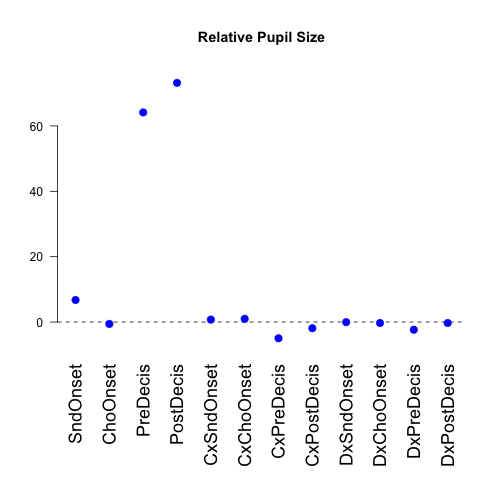

In [226]:
%%R

print(summary(ModelChoiceH_1))
BIC1 = BIC(ModelChoiceH_1)

print("High BIC:")
print(BIC1)
title_plot = "Relative Pupil Size"
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),,main=title_plot)

## Same regression but including deviation index (eye movement) as a regressor

In [227]:
%%R
title_plot = "Pupil "

ModelChoiceH_1 <- glm(pupil ~ DevIdx + SndOnset + ChoOnset + PreDecis + PostDecis + CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis +  DxSndOnset+DxChoOnset+ DxPreDecis+DxPostDecis  , data=pupilRegressModel)


Call:
glm(formula = pupil ~ DevIdx + SndOnset + ChoOnset + PreDecis + 
    PostDecis + CxSndOnset + CxChoOnset + CxPreDecis + CxPostDecis + 
    DxSndOnset + DxChoOnset + DxPreDecis + DxPostDecis, data = pupilRegressModel)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4058  -0.3276   0.1043   0.4371   5.0413  

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.997e-01  5.422e-04 -368.293  < 2e-16 ***
DevIdx      -4.654e-04  2.282e-06 -203.957  < 2e-16 ***
SndOnset     6.404e+00  3.727e-02  171.831  < 2e-16 ***
ChoOnset    -6.137e-01  3.849e-02  -15.943  < 2e-16 ***
PreDecis     6.540e+01  7.098e-02  921.292  < 2e-16 ***
PostDecis    7.278e+01  9.431e-02  771.651  < 2e-16 ***
CxSndOnset   7.676e-01  3.725e-02   20.605  < 2e-16 ***
CxChoOnset   1.019e+00  4.005e-02   25.434  < 2e-16 ***
CxPreDecis  -5.091e+00  6.451e-02  -78.924  < 2e-16 ***
CxPostDecis -1.902e+00  7.997e-02  -23.781  < 2e-16 ***
DxSndOnset  -1.712e-02  3.788e-

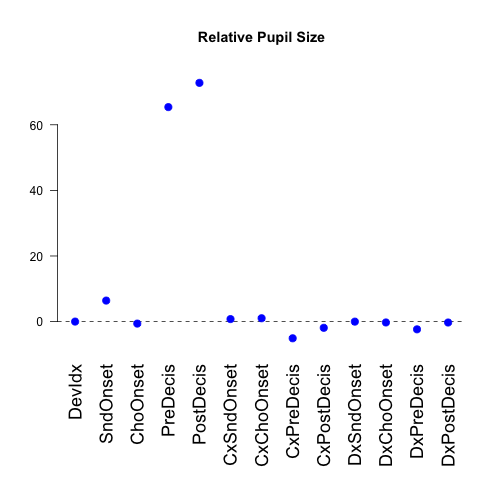

In [228]:
%%R

print(summary(ModelChoiceH_1))
BIC1 = BIC(ModelChoiceH_1)

print("High BIC:")
print(BIC1)
title_plot = "Relative Pupil Size"
coefplot(ModelChoiceH_1, intercept=FALSE, vertical = FALSE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),,main=title_plot)

# Separate by frame GLM analysis, focus only on predecision effects for simplicity

In [229]:
def generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,frameIdx):
    pupilTrialAll = []
    # initialize regressors trials together
    regSndOnsetlAll = []
    regChoOnsetlAll = []
    regPreDecAll = []
   # regPostDeclAll = []
    
    regSndOnsetlAll_C = []
    regChoOnsetlAll_C = []
    regPreDecAll_C= []
   # regPostDeclAll_C = []
    
    regSndOnsetlAll_D = []
    regChoOnsetlAll_D = []
    regPreDecAll_D = []
   # regPostDeclAll_D = []

    regSndOnsetlAll_Cho = []
    regChoOnsetlAll_Cho = []
    regPreDecAll_Cho = []
    
    regSndOnsetlAll_unCho = []
    regChoOnsetlAll_unCho = []
    regPreDecAll_unCho = []
     
    regSndOnsetlAll_SumCli = []
    regChoOnsetlAll_SumCli = []
    regPreDecAll_SumCli = []

    partInfo = []
    
    # extract trials from the relevant frame
    
    choiceFrameSelect =  choiceFrameAll.loc[choiceFrameAll['frame'] == frameIdx]
    indexFrame = choiceFrameSelect.index.values # select only the frame relevant trials 
    
    pupiIdxBehavFrame = pupiIdxBehav.iloc[indexFrame]
    
    beginTrialIdx = pupiIdxBehavFrame['itiIdx'].values.astype(int)
    endTrialIdx = pupiIdxBehavFrame['confBeginIdx'].values.astype(int)
    
    j = 0
    for i in beginTrialIdx:
        
        trialPupilIter = pupilInfo.iloc[ i : endTrialIdx[j]]
        
        # define regressors:
        regSndOnset = ((trialPupilIter.SAMPLE_MESSAGE.str.contains('FIRST_SOUND_R'))*1).values # regressor for stimulus onset
        regChoiceOnset = (((trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_R')) | (trialPupilIter.SAMPLE_MESSAGE.str.contains('DISPLAY_FEEDBACK_L')))*1).values # regressor for choice onset
    
        
        
        # boxcar regressor pre-decision
        reg0 = np.zeros(len(regSndOnset))
        reg0Begin = np.where(regSndOnset == 1)[0][0] # from the sound presentation
        reg0End = np.where(regChoiceOnset == 1)[0][0] # to the choice
        
        regLen = len(reg0[reg0Begin:reg0End])    
        reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
        regPreDecision = reg0
        
        ## boxcar regressor post-decision
        #reg0 = np.zeros(len(regSndOnset))
        #reg0Begin = np.where(regChoiceOnset == 1)[0][0] # from the choice
        #reg0End = len(regSndOnset) # to the end of the trial
        #
        #regLen = len(reg0[reg0Begin:reg0End])    
        #reg0[reg0Begin:reg0End] = [1/regLen] * regLen # normalize boxcar regressor by its length
        #regPostDecision = reg0
        
        # add pupil data
        pupilTrialAll.extend(trialPupilIter.zPupil.values)
        
        # calculate convolved regressors
        conRegSndOnset =  numpy.convolve(regSndOnset, h, mode='full')[0:len(regSndOnset)]
        conRegChoiceOnset = numpy.convolve(regChoiceOnset, h, mode='full')[0:len(regChoiceOnset)]
        conRegPreDecision = numpy.convolve(regPreDecision, h, mode='full')[0:len(regPreDecision)]
       # conRegPostDecision = numpy.convolve(regPostDecision, h, mode='full')[0:len(regPostDecision)]
        
        # add up the regressor
        regSndOnsetlAll.extend(conRegSndOnset)
        regChoOnsetlAll.extend(conRegChoiceOnset)
        regPreDecAll.extend(conRegPreDecision)
       # regPostDeclAll.extend(conRegPostDecision)
        
        ################################################
        # extract parametric modulators from behaviour.#
        ################################################
        
        confParamIter = choiceFrameSelect.iloc[j].zConf    
        absDFreqParamIter = choiceFrameSelect.iloc[j].zAbsDFreq    
        choFreqParamIter = choiceFrameSelect.iloc[j].zChoFreq    
        unchoFreqParamIter = choiceFrameSelect.iloc[j].zUnchoFreq    
        sumFreqParamIter = choiceFrameSelect.iloc[j].zTotFreq    

        partIter = choiceFrameSelect.iloc[j].part    

        
        # confidence modulated regressor
        regSndOnsetlAll_C.extend(conRegSndOnset*confParamIter)
        regChoOnsetlAll_C.extend(conRegChoiceOnset*confParamIter)
        regPreDecAll_C.extend(conRegPreDecision*confParamIter)
      #  regPostDeclAll_C.extend(conRegPostDecision*confParamIter)
        
        # difficulty modulated regressor
        regSndOnsetlAll_D.extend(conRegSndOnset*absDFreqParamIter)
        regChoOnsetlAll_D.extend(conRegChoiceOnset*absDFreqParamIter)
        regPreDecAll_D.extend(conRegPreDecision*absDFreqParamIter)
      #  regPostDeclAll_D.extend(conRegPostDecision*absDFreqParamIter)

        regSndOnsetlAll_Cho.extend(conRegSndOnset*choFreqParamIter)
        regChoOnsetlAll_Cho.extend(conRegChoiceOnset*choFreqParamIter)    
        regPreDecAll_Cho.extend(conRegPreDecision*choFreqParamIter)
        
        regSndOnsetlAll_unCho.extend(conRegSndOnset*unchoFreqParamIter)
        regChoOnsetlAll_unCho.extend(conRegChoiceOnset*unchoFreqParamIter)    
        regPreDecAll_unCho.extend(conRegPreDecision*unchoFreqParamIter)
        
        
        regSndOnsetlAll_SumCli.extend(conRegSndOnset*sumFreqParamIter)
        regChoOnsetlAll_SumCli.extend(conRegChoiceOnset*sumFreqParamIter)    
        regPreDecAll_SumCli.extend(conRegPreDecision*sumFreqParamIter)
        
        
        partInfo.extend([partIter]*len(conRegPreDecision)) # add column including participant information

    
        j = j + 1
        
    pupilRegressModel = pd.DataFrame()   
    pupilRegressModel['pupil'] = pupilTrialAll
    pupilRegressModel['SndOnset']=regSndOnsetlAll
    pupilRegressModel['ChoOnset']=regChoOnsetlAll
    pupilRegressModel['PreDecis']=regPreDecAll
   # pupilRegressModel['PostDecis']=regPostDeclAll
    pupilRegressModel['CxSndOnset']=regSndOnsetlAll_C
    pupilRegressModel['CxChoOnset']=regChoOnsetlAll_C
    pupilRegressModel['CxPreDecis']=regPreDecAll_C
   # pupilRegressModel['CxPostDecis']=regPostDeclAll_C
    pupilRegressModel['DxSndOnset']=regSndOnsetlAll_D
    pupilRegressModel['DxChoOnset']=regChoOnsetlAll_D
    pupilRegressModel['DxPreDecis']=regPreDecAll_D
   # pupilRegressModel['DxPostDecis']=regPostDeclAll_D
    
    # chosen option regressors
    pupilRegressModel['ChoCxSndOnset']=regSndOnsetlAll_Cho
    pupilRegressModel['ChoCxChoOnset']=regChoOnsetlAll_Cho
    pupilRegressModel['ChoCxPreDecis']=regPreDecAll_Cho
    
    # unchosen option regressors
    pupilRegressModel['uChoCxSndOnset']=regSndOnsetlAll_unCho
    pupilRegressModel['uChoCxChoOnset']=regChoOnsetlAll_unCho
    pupilRegressModel['uChoCxPreDecis']=regPreDecAll_unCho
    
    # sum chosen regressors
    pupilRegressModel['SumCxSndOnset']=regSndOnsetlAll_SumCli
    pupilRegressModel['SumCxChoOnset']=regChoOnsetlAll_SumCli
    pupilRegressModel['SumCxPreDecis']=regPreDecAll_SumCli

    pupilRegressModel['Part']=partInfo
    
    
    return pupilRegressModel

In [230]:
pupilRegressModelH = generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,1)
pupilRegressModelL = generatePupilRegress(pupilInfo,choiceFrameAll,pupiIdxBehav,2)

In [231]:
%R -i pupilRegressModelH -i pupilRegressModelL

## regression separated by frame using $\Sigma$Clicks

In [232]:
%%R
ModelPupilH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + SumCxSndOnset + SumCxChoOnset + SumCxPreDecis , data=pupilRegressModelH)
ModelPupilL_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + SumCxSndOnset + SumCxChoOnset + SumCxPreDecis , data=pupilRegressModelL)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    SumCxSndOnset + SumCxChoOnset + SumCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.0247  -0.3641   0.1060   0.4975   2.8752  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0343259  0.0006624  51.819  < 2e-16 ***
SndOnset       3.6020988  0.0564957  63.759  < 2e-16 ***
ChoOnset       8.9701008  0.0563523 159.179  < 2e-16 ***
PreDecis      42.1046666  0.1017545 413.787  < 2e-16 ***
CxSndOnset     0.6908475  0.0584339  11.823  < 2e-16 ***
CxChoOnset     0.1123187  0.0582431   1.928   0.0538 .  
CxPreDecis    -2.3203669  0.1011687 -22.936  < 2e-16 ***
DxSndOnset    -0.1307111  0.0584045  -2.238   0.0252 *  
DxChoOnset    -0.4487920  0.0581798  -7.714 1.22e-14 ***
DxPreDecis    -1.1673237  0.0967632 -12.064  < 2e-16 ***
SumCxSndOnset  0.118

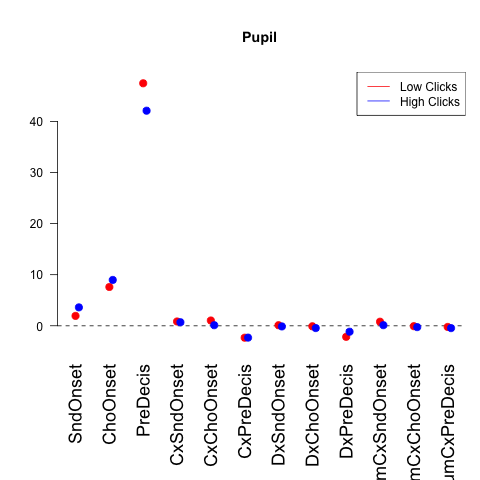

In [233]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

## regression separated by frame using Chosen Clicks number

In [234]:
%%R
ModelPupilH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis , data=pupilRegressModelH)
ModelPupilL_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis , data=pupilRegressModelL)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.0245  -0.3642   0.1059   0.4975   2.8754  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0341232  0.0006625  51.510  < 2e-16 ***
SndOnset       3.4863155  0.0661825  52.677  < 2e-16 ***
ChoOnset       8.9578065  0.0660071 135.710  < 2e-16 ***
PreDecis      43.1685988  0.1187608 363.492  < 2e-16 ***
CxSndOnset     0.6682051  0.0582747  11.466  < 2e-16 ***
CxChoOnset     0.1339045  0.0580831   2.305 0.021145 *  
CxPreDecis    -2.2311866  0.1007342 -22.149  < 2e-16 ***
DxSndOnset    -0.2260413  0.0648260  -3.487 0.000489 ***
DxChoOnset    -0.4685688  0.0645876  -7.255 4.02e-13 ***
DxPreDecis    -0.3233542  0.1085460  -2.979 0.002892 ** 
ChoCxSndOnset  0.260

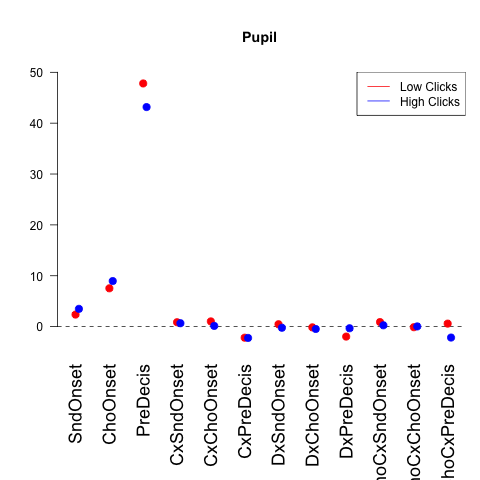

In [235]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

## regression separated by frame using Chosen and unchosen Clicks number

In [236]:
%%R
ModelPupilH_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + uChoCxSndOnset + uChoCxChoOnset + uChoCxPreDecis , data=pupilRegressModelH)
ModelPupilL_1 <- glm(pupil ~  SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + uChoCxSndOnset + uChoCxChoOnset + uChoCxPreDecis , data=pupilRegressModelL)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + uChoCxSndOnset + 
    uChoCxChoOnset + uChoCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.0242  -0.3644   0.1060   0.4975   2.8757  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0337820  0.0006626  50.980  < 2e-16 ***
SndOnset        3.4416764  0.0852977  40.349  < 2e-16 ***
ChoOnset        8.4451927  0.0850814  99.260  < 2e-16 ***
PreDecis       45.0865718  0.1551465 290.606  < 2e-16 ***
CxSndOnset      0.6524722  0.0598405  10.904  < 2e-16 ***
CxChoOnset      0.0016000  0.0596450   0.027 0.978599    
CxPreDecis     -1.7840393  0.1034218 -17.250  < 2e-16 ***
DxSndOnset     -0.2655866  0.0770150  -3.449 0.000564 ***
DxChoOnset     -0.8701021  0.0767621 -11.335  < 2e-16 ***
DxPreDecis 

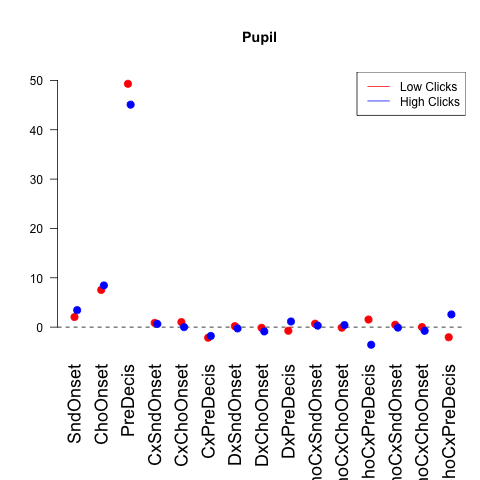

In [237]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)


Call:
glm(formula = pupil ~ SndOnset + ChoOnset + PreDecis + CxSndOnset + 
    CxChoOnset + CxPreDecis + DxSndOnset + DxChoOnset + DxPreDecis + 
    ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + uChoCxSndOnset + 
    uChoCxChoOnset + uChoCxPreDecis, data = pupilRegressModelH)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.0242  -0.3644   0.1060   0.4975   2.8757  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0337820  0.0006626  50.980  < 2e-16 ***
SndOnset        3.4416764  0.0852977  40.349  < 2e-16 ***
ChoOnset        8.4451927  0.0850814  99.260  < 2e-16 ***
PreDecis       45.0865718  0.1551465 290.606  < 2e-16 ***
CxSndOnset      0.6524722  0.0598405  10.904  < 2e-16 ***
CxChoOnset      0.0016000  0.0596450   0.027 0.978599    
CxPreDecis     -1.7840393  0.1034218 -17.250  < 2e-16 ***
DxSndOnset     -0.2655866  0.0770150  -3.449 0.000564 ***
DxChoOnset     -0.8701021  0.0767621 -11.335  < 2e-16 ***
DxPreDecis 

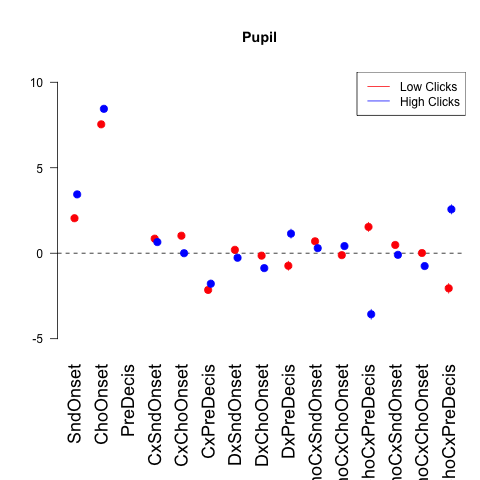

In [238]:
%%R
title_plot = "Pupil "

BIC1 = BIC(ModelPupilH_1)
BIC2 = BIC(ModelPupilL_1)

print(summary(ModelPupilH_1))
print(summary(ModelPupilL_1))
print("High BIC:")
print(BIC1)
print("Low BIC:")
print(BIC2)

coefplot(ModelPupilL_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1),ylim = c(-5,10)  ,main=title_plot)
coefplot(ModelPupilH_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Low Clicks", "High Clicks"),col=c("red", "blue"), lty=1:1, cex=1)

# Hierarchical GLM, splitted by frame

In [239]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~   ChoOnset + PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + (ChoOnset + PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 14 negative eigenvalues 

Formula: pupil~ChoOnset+PreDecis+CxPreDecis+DxPreDecis+ChoCxPreDecis+(ChoOnset+PreDecis+CxPreDecis+DxPreDecis+ChoCxPreDecis|Part)

Family: gaussian	 Inference: parametric

Number of observations: 2129430	 Groups: {'Part': 32.0}

Log-likelihood: -2322698.581 	 AIC: 4645397.163

Random effects:

                   Name       Var     Std
Part        (Intercept)     0.015   0.122
Part           ChoOnset    47.817   6.915
Part           PreDecis  1059.826  32.555
Part         CxPreDecis    42.932   6.552
Part         DxPreDecis    17.817   4.221
Part      ChoCxPreDecis    18.478   4.299
Residual                    0.518   0.720

              IV1            IV2   Corr
Part  (Intercept)       ChoOnset -0.235
Part  (Intercept)       PreDecis -0.799
Part  (Intercept)     CxPreDecis  0.493
Part  (Intercept)     DxPreDecis  0.308
Part  (Intercept)  ChoCxPreDecis -0.047
Part     ChoOn

In [240]:
# FULL MODEL TAKES TOO LONG TO RUN.

# from pymer4.models import Lmer
# #
# regFormula1 = "pupil ~   SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis + (SndOnset + ChoOnset + PreDecis  + CxSndOnset + CxChoOnset + CxPreDecis  +  DxSndOnset+DxChoOnset+ DxPreDecis + ChoCxSndOnset + ChoCxChoOnset + ChoCxPreDecis|Part)"
# #
# model1 = Lmer(regFormula1, data=pupilRegressModelH)
# model2 = Lmer(regFormula1, data=pupilRegressModelL)
# 
# #
# model1.fit()
# model2.fit()
# 
# table_data1 = model1.coefs.T
# par_table_data1 = model1.fixef
# 
# table_data2 = model2.coefs.T
# par_table_data2 = model2.fixef
# 

In [241]:
table_data1

(Intercept)     ChoOnset     PreDecis  CxPreDecis DxPreDecis  \
Estimate    0.0416164       8.2188      45.9997    -3.63051   0.366472   
2.5_ci   -0.000642636       5.8207      34.7181    -5.90744   -1.10716   
97.5_ci     0.0838755      10.6169      57.2813    -1.35358    1.84011   
SE          0.0215611      1.22354      5.75603     1.16172   0.751868   
DF            36.1233      31.5167      36.9151     32.5047    31.4131   
T-stat        1.93016      6.71722      7.99157    -3.12511   0.487416   
P-val       0.0614677  1.49428e-07  1.43732e-09  0.00372734   0.629348   
Sig                 .          ***          ***          **              

         ChoCxPreDecis  
Estimate      -1.50464  
2.5_ci        -3.00871  
97.5_ci    -0.00056996  
SE            0.767398  
DF             30.4019  
T-stat        -1.96071  
P-val        0.0591313  
Sig                  .

In [242]:
table_data2

(Intercept)    ChoOnset     PreDecis CxPreDecis  DxPreDecis  \
Estimate   0.0296268     7.39016       52.892   -1.72149    -1.84911   
2.5_ci   -0.00779121      4.8416      43.9224   -3.60564    -3.09605   
97.5_ci    0.0670447     9.93872      61.8616   0.162662   -0.602161   
SE         0.0190911     1.30031       4.5764   0.961319    0.636209   
DF           42.8878     18.9461       61.836    22.2433     29.6104   
T-stat       1.55186     5.68339      11.5576   -1.79076    -2.90645   
P-val       0.128045  1.7883e-05  4.30479e-17  0.0869529  0.00685771   
Sig                          ***          ***          .          **   

         ChoCxPreDecis  
Estimate      0.408561  
2.5_ci       -0.651769  
97.5_ci        1.46889  
SE            0.540995  
DF             38.8479  
T-stat        0.755204  
P-val         0.454681  
Sig

([<matplotlib.axis.XTick at 0x7f8b784d1d68>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ChoOnset'),
  Text(3.25, 0, 'PreDecis'),
  Text(4.25, 0, 'ConfxPreDecis'),
  Text(5.25, 0, '|ΔClicks|xPreDecis'),
  Text(6.25, 0, 'ChoClicksxPreDecis')])

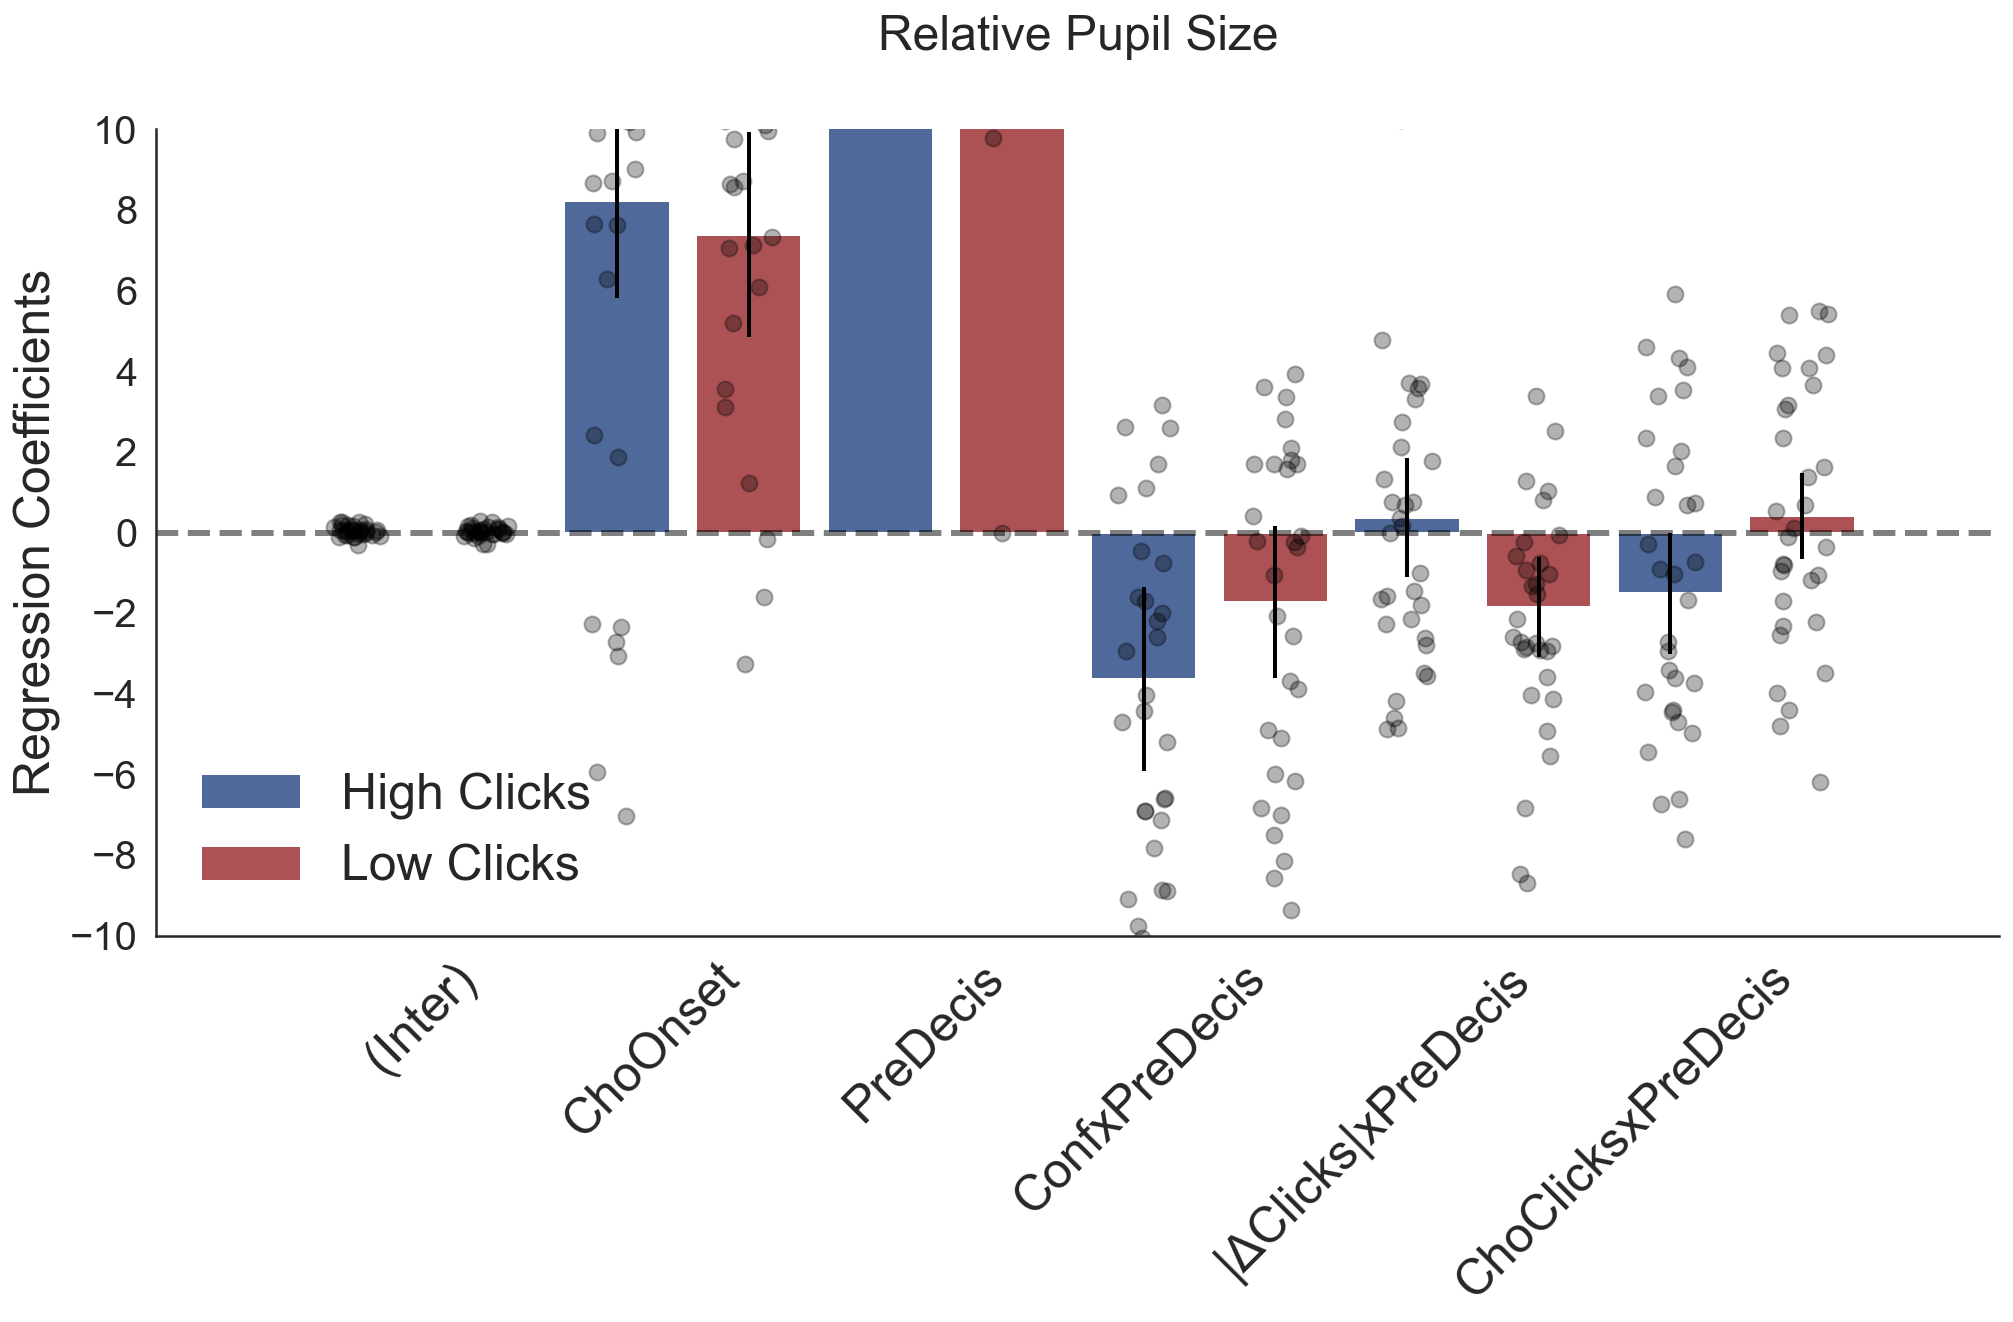

In [243]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','ChoOnset','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

([<matplotlib.axis.XTick at 0x7f8b78063f28>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ChoOnset'),
  Text(3.25, 0, 'PreDecis'),
  Text(4.25, 0, 'ConfxPreDecis'),
  Text(5.25, 0, '|ΔClicks|xPreDecis'),
  Text(6.25, 0, 'ChoClicksxPreDecis')])

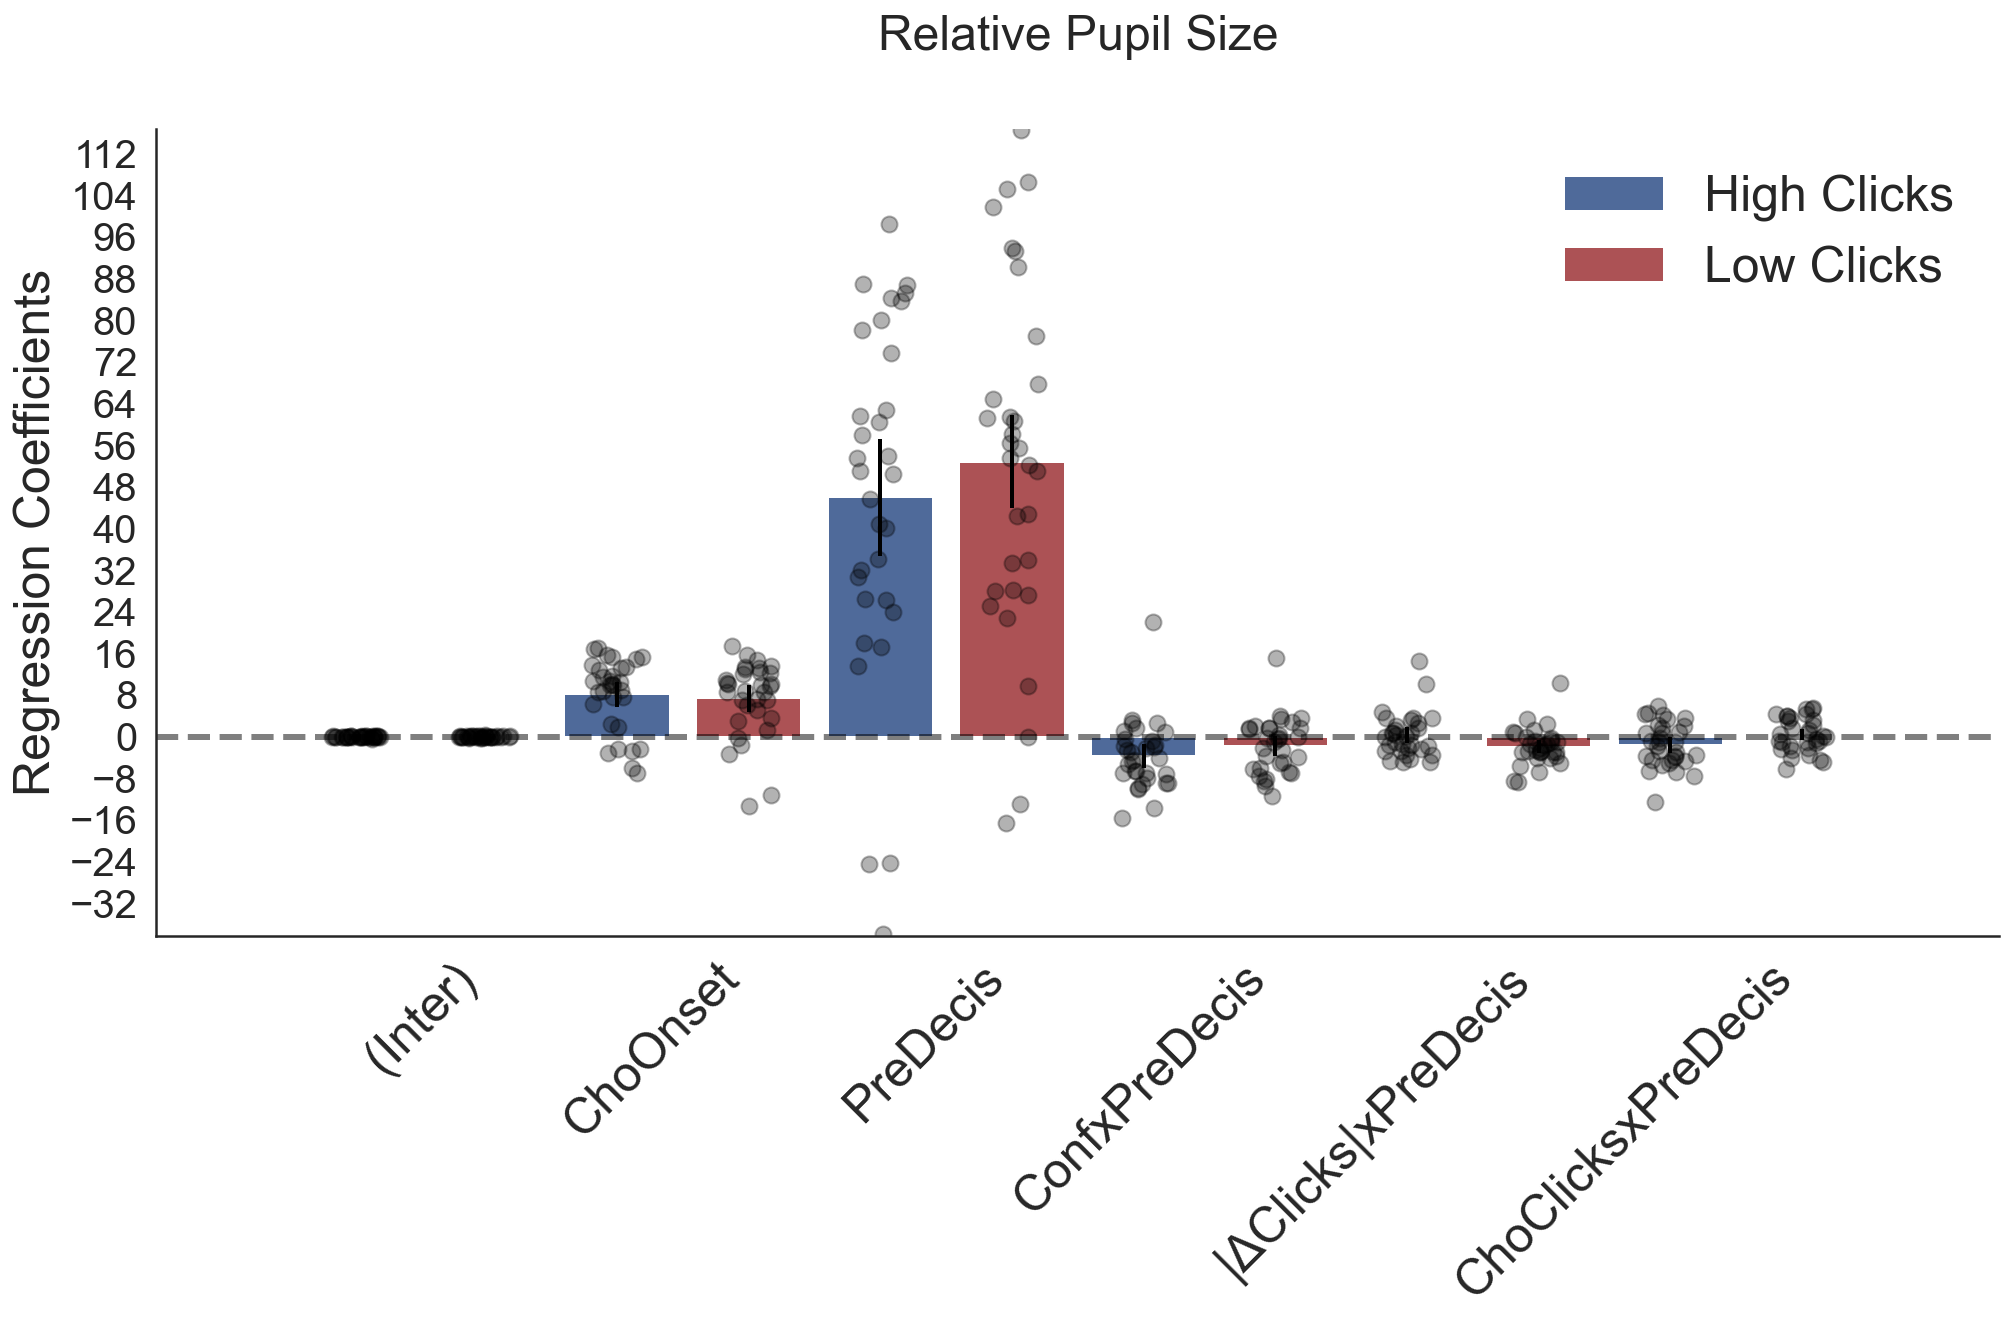

In [244]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','ChoOnset','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

In [245]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

Ttest_relResult(statistic=-1.8961996670669725, pvalue=0.06728770433588994)

In [246]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

Ttest_relResult(statistic=-1.8961996670669725, pvalue=0.06728770433588994)

In [247]:
print(np.mean(par_table_data1.ChoCxPreDecis.values))
print(np.mean(par_table_data2.ChoCxPreDecis.values))
print(np.mean(par_table_data1.ChoCxPreDecis.values) - np.mean(par_table_data2.ChoCxPreDecis.values))

-1.5046422984231635
0.4085613260287661
-1.9132036244519297


# Hierarchical GLM, splitted by frame, include chosen and unchosen

In [248]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~   ChoOnset + PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + uChoCxPreDecis + (ChoOnset + PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + uChoCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 7 negative eigenvalues 

Formula: pupil~ChoOnset+PreDecis+CxPreDecis+DxPreDecis+ChoCxPreDecis+uChoCxPreDecis+(ChoOnset+PreDecis+CxPreDecis+DxPreDecis+ChoCxPreDecis+uChoCxPreDecis|Part)

Family: gaussian	 Inference: parametric

Number of observations: 2129430	 Groups: {'Part': 32.0}

Log-likelihood: -2321975.336 	 AIC: 4643950.672

Random effects:

                    Name       Var     Std
Part         (Intercept)     0.013   0.116
Part            ChoOnset    49.746   7.053
Part            PreDecis  1024.477  32.007
Part          CxPreDecis    36.527   6.044
Part          DxPreDecis    22.477   4.741
Part       ChoCxPreDecis    53.856   7.339
Part      uChoCxPreDecis    35.257   5.938
Residual                     0.518   0.720

                IV1             IV2   Corr
Part    (Intercept)        ChoOnset -0.242
Part    (Intercept)        PreDecis -0.718
Part    (Intercept)      CxPreDecis  0.362
Pa

In [249]:
table_data1

(Intercept)    ChoOnset    PreDecis  CxPreDecis DxPreDecis  \
Estimate   0.0413648      8.2245     47.0769    -3.37577    1.16305   
2.5_ci    0.00129969     5.77861     35.9804    -5.47777  -0.505088   
97.5_ci    0.0814298     10.6704     58.1733    -1.27377    2.83119   
SE         0.0204417     1.24793     5.66154     1.07247   0.851107   
DF           41.3414     29.4268     47.2606     35.1353    28.4823   
T-stat       2.02354     6.59053      8.3152    -3.14767    1.36652   
P-val      0.0495137  2.9769e-07  8.3027e-11  0.00334811   0.182469   
Sig                *         ***         ***          **              

         ChoCxPreDecis uChoCxPreDecis  
Estimate      -2.35797         1.2021  
2.5_ci        -4.92284      -0.879696  
97.5_ci       0.206901        3.28389  
SE             1.30863        1.06216  
DF             25.9587        27.8234  
T-stat        -1.80186        1.13175  
P-val        0.0831937         0.2674  
Sig                  .

In [250]:
table_data2

(Intercept)   ChoOnset     PreDecis CxPreDecis DxPreDecis  \
Estimate   0.0293115    7.39739      52.9603   -1.75598   -1.70127   
2.5_ci    -0.0117529    4.95717      41.6013   -3.65965   -3.66692   
97.5_ci     0.070376     9.8376      64.3193   0.147694   0.264377   
SE         0.0209516    1.24503      5.79552    0.97128     1.0029   
DF           37.3731    34.3947      40.5079    27.4441    28.4442   
T-stat       1.39901    5.94153      9.13814    -1.8079   -1.69635   
P-val       0.170055  9.829e-07  2.16052e-11  0.0815942   0.100739   
Sig                         ***          ***          .              

         ChoCxPreDecis uChoCxPreDecis  
Estimate      0.404918       -0.37011  
2.5_ci        -1.50462       -2.50117  
97.5_ci        2.31446        1.76095  
SE            0.974273         1.0873  
DF             27.3735        26.4681  
T-stat         0.41561      -0.340395  
P-val         0.680935       0.736246  
Sig

([<matplotlib.axis.XTick at 0x7f8b781327f0>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ChoOnset'),
  Text(3.25, 0, 'PreDecis'),
  Text(4.25, 0, 'ConfxPreDecis'),
  Text(5.25, 0, '|ΔClicks|xPreDecis'),
  Text(6.25, 0, 'ChoClicksxPreDecis')])

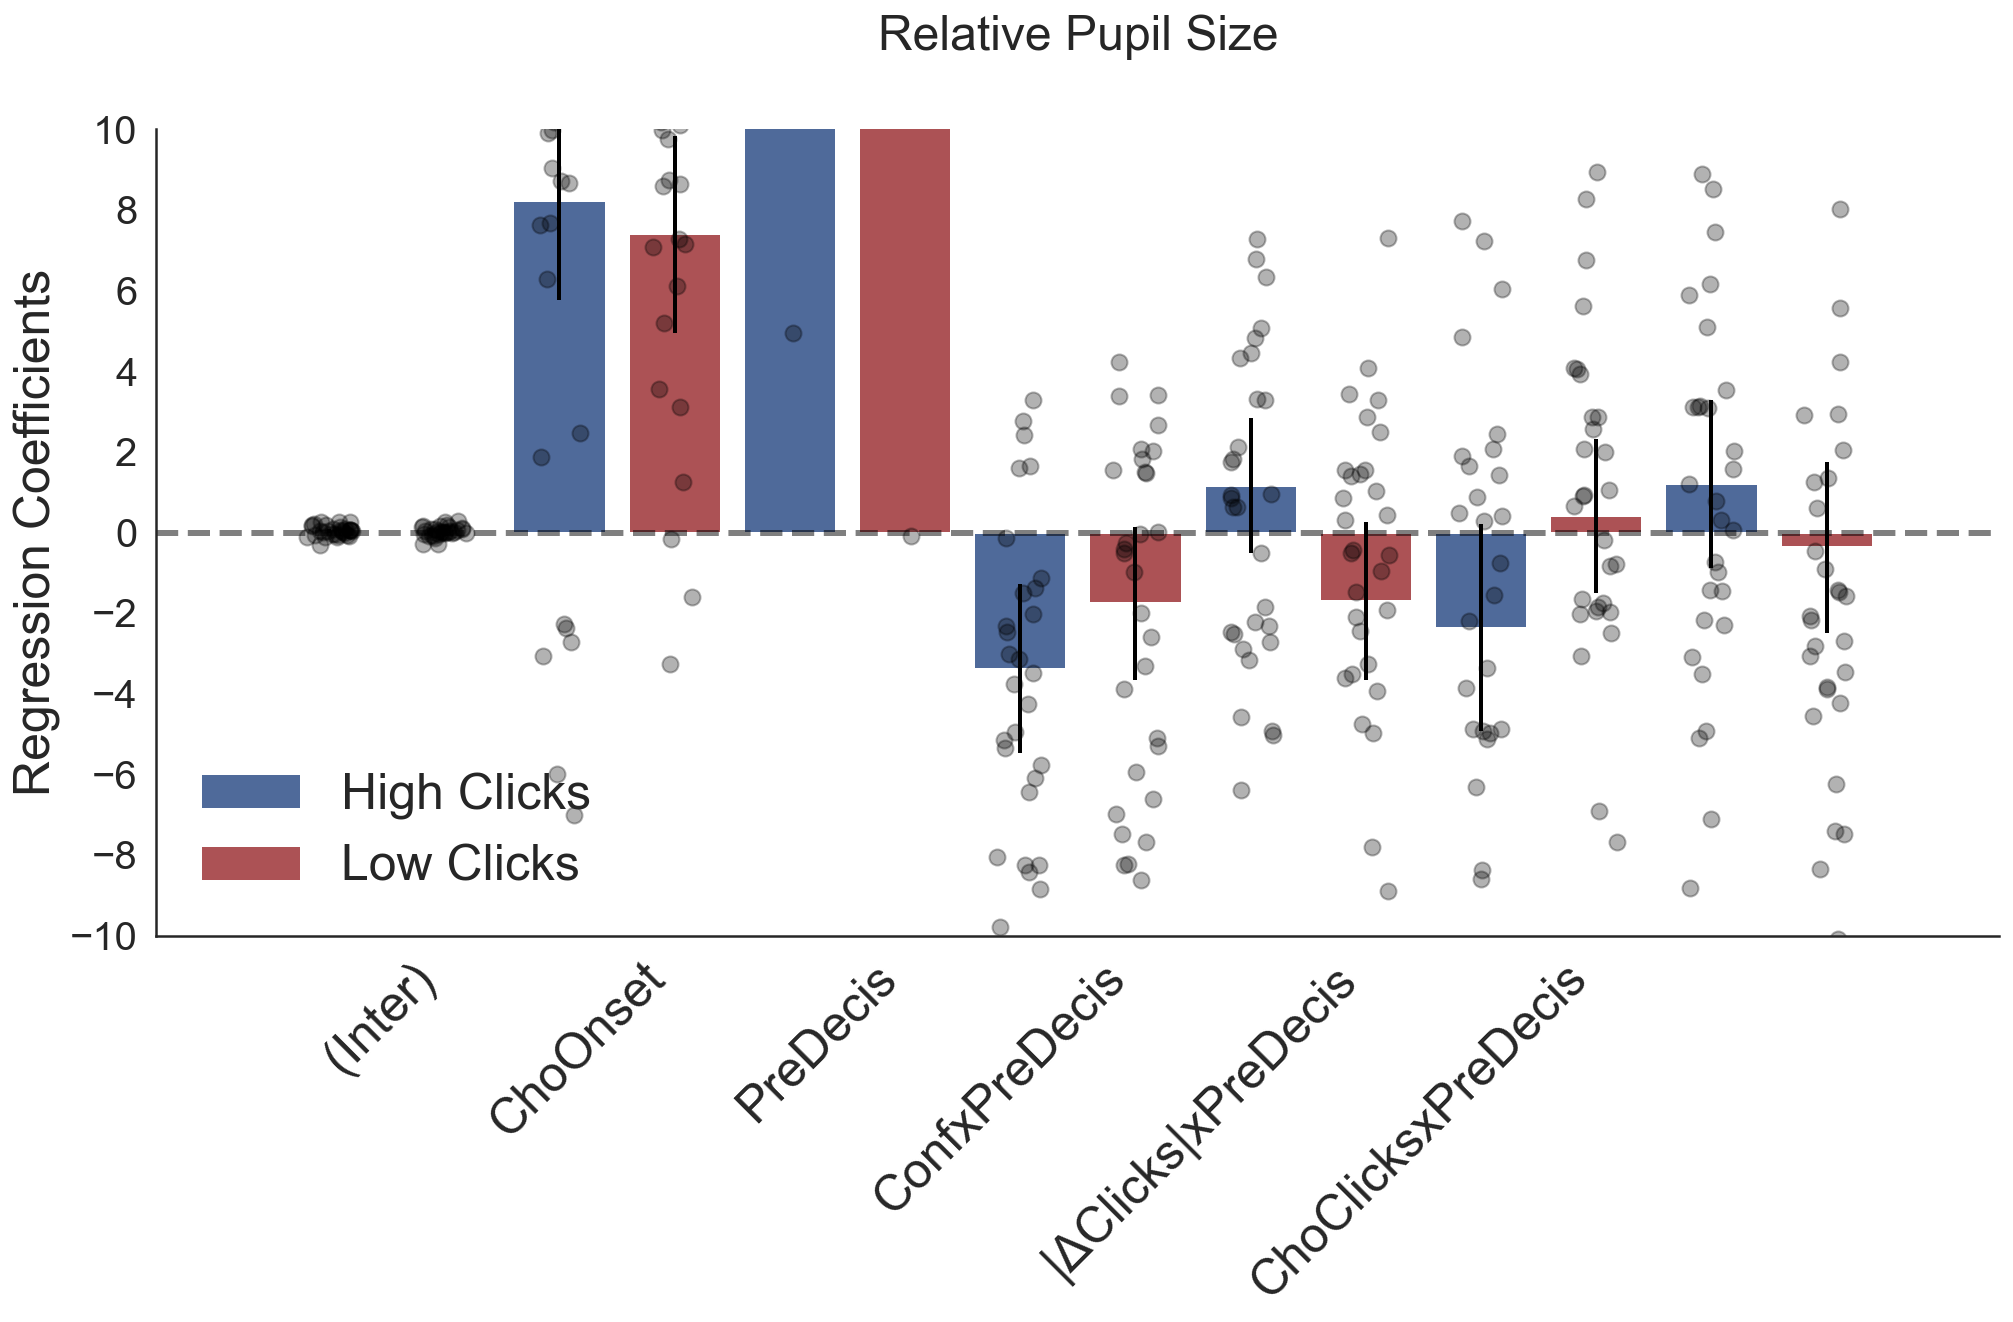

In [251]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','ChoOnset','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

([<matplotlib.axis.XTick at 0x7f8d58359e80>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'ChoOnset'),
  Text(3.25, 0, 'PreDecis'),
  Text(4.25, 0, 'ConfxPreDecis'),
  Text(5.25, 0, '|ΔClicks|xPreDecis'),
  Text(6.25, 0, 'ChoClicksxPreDecis'),
  Text(7.25, 0, 'UnchoClicksxPreDecis')])

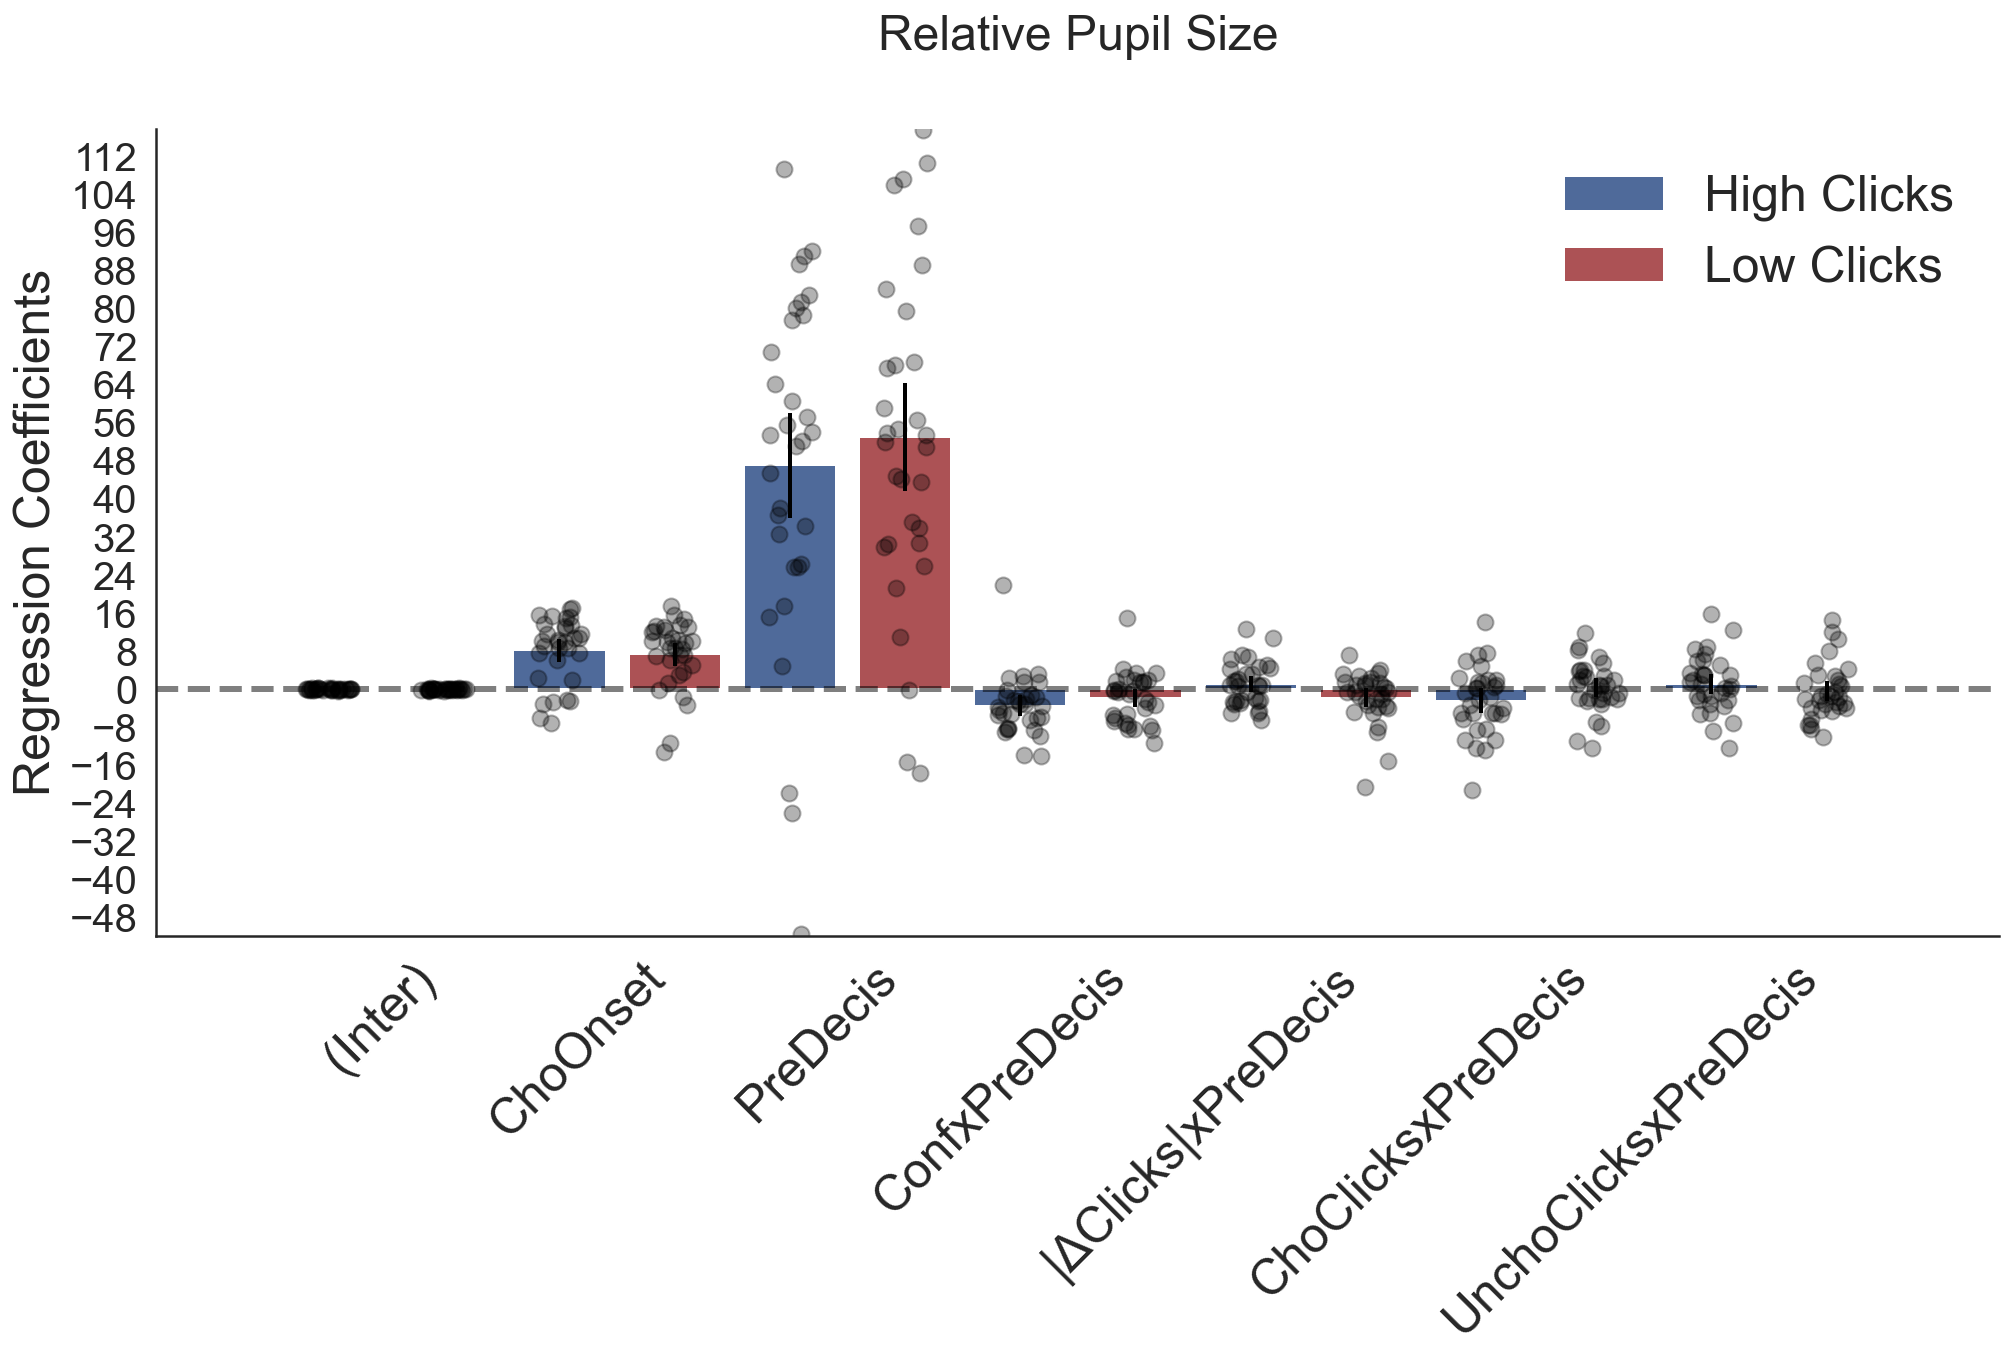

In [252]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25,7.25],['(Inter)','ChoOnset','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis','UnchoClicksxPreDecis'], rotation=45)

In [253]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

Ttest_relResult(statistic=-1.7438654025283298, pvalue=0.09109301191445039)

In [254]:
stats.ttest_rel(par_table_data1.uChoCxPreDecis.values,par_table_data2.uChoCxPreDecis.values)

Ttest_relResult(statistic=1.1118743823937511, pvalue=0.2747410187952572)

In [255]:
print(np.mean(par_table_data1.ChoCxPreDecis.values))
print(np.mean(par_table_data2.ChoCxPreDecis.values))
print(np.mean(par_table_data1.ChoCxPreDecis.values) - np.mean(par_table_data2.ChoCxPreDecis.values))

-2.3579679481117957
0.40491761954764466
-2.76288556765944


In [256]:
print(np.mean(par_table_data1.uChoCxPreDecis.values))
print(np.mean(par_table_data2.uChoCxPreDecis.values))
print(np.mean(par_table_data1.uChoCxPreDecis.values) - np.mean(par_table_data2.uChoCxPreDecis.values))

1.2020967641132922
-0.3701097311406764
1.5722064952539687


# Hierarchical GLM, splitted by frame, include chosen and unchosen

In [ ]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~  PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + uChoCxPreDecis + (PreDecis + CxPreDecis + DxPreDecis+ ChoCxPreDecis + uChoCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


In [ ]:
table_data1

In [ ]:
table_data2

In [ ]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis'], rotation=45)

In [ ]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25,6.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','ChoClicksxPreDecis','UnchoClicksxPreDecis'], rotation=45)

In [ ]:
stats.ttest_rel(par_table_data1.ChoCxPreDecis.values,par_table_data2.ChoCxPreDecis.values)

In [ ]:
stats.ttest_rel(par_table_data1.uChoCxPreDecis.values,par_table_data2.uChoCxPreDecis.values)

In [ ]:
print(np.mean(par_table_data1.ChoCxPreDecis.values))
print(np.mean(par_table_data2.ChoCxPreDecis.values))
print(np.mean(par_table_data1.ChoCxPreDecis.values) - np.mean(par_table_data2.ChoCxPreDecis.values))

In [ ]:
print(np.mean(par_table_data1.uChoCxPreDecis.values))
print(np.mean(par_table_data2.uChoCxPreDecis.values))
print(np.mean(par_table_data1.uChoCxPreDecis.values) - np.mean(par_table_data2.uChoCxPreDecis.values))

# Hierarchical GLM, splitted by frame, include SumEvidence

In [257]:
from pymer4.models import Lmer
#
regFormula1 = "pupil ~  PreDecis + CxPreDecis + DxPreDecis+ SumCxPreDecis + (PreDecis + CxPreDecis + DxPreDecis+ SumCxPreDecis |Part)"
#
model1 = Lmer(regFormula1, data=pupilRegressModelH)
model2 = Lmer(regFormula1, data=pupilRegressModelL)

#
model1.fit()
model2.fit()

table_data1 = model1.coefs.T
par_table_data1 = model1.fixef

table_data2 = model2.coefs.T
par_table_data2 = model2.fixef


unable to evaluate scaled gradient 

Model failed to converge: degenerate  Hessian with 2 negative eigenvalues 

Formula: pupil~PreDecis+CxPreDecis+DxPreDecis+SumCxPreDecis+(PreDecis+CxPreDecis+DxPreDecis+SumCxPreDecis|Part)

Family: gaussian	 Inference: parametric

Number of observations: 2129430	 Groups: {'Part': 32.0}

Log-likelihood: -2343007.046 	 AIC: 4686014.093

Random effects:

                   Name       Var     Std
Part        (Intercept)     0.015   0.122
Part           PreDecis  1120.737  33.477
Part         CxPreDecis    39.599   6.293
Part         DxPreDecis    16.819   4.101
Part      SumCxPreDecis    11.198   3.346
Residual                    0.529   0.727

              IV1            IV2   Corr
Part  (Intercept)       PreDecis -0.826
Part  (Intercept)     CxPreDecis  0.532
Part  (Intercept)     DxPreDecis  0.332
Part  (Intercept)  SumCxPreDecis -0.144
Part     PreDecis     CxPreDecis -0.710
Part     PreDecis     DxPreDecis -0.421
Part     PreDecis  SumCxPreDecis  0

In [258]:
table_data1

(Intercept)     PreDecis CxPreDecis DxPreDecis SumCxPreDecis
Estimate   0.0613253      48.4525   -3.34778  -0.157819     -0.654638
2.5_ci      0.019046      36.8518   -5.53538   -1.58754      -1.82418
97.5_ci     0.103605      60.0531   -1.16017     1.2719        0.5149
SE         0.0215714       5.9188    1.11615   0.729464      0.596714
DF           33.9274      34.8253    32.6854    31.1123       31.2232
T-stat       2.84289       8.1862   -2.99941  -0.216349      -1.09707
P-val     0.00751658  1.25364e-09  0.0051418   0.830128         0.281
Sig               **          ***         **

In [259]:
table_data2

(Intercept)     PreDecis CxPreDecis DxPreDecis SumCxPreDecis
Estimate   0.0476727      55.4272   -1.50821   -1.86569      0.122611
2.5_ci    0.00839365      44.1132   -3.35124   -3.21398     -0.744443
97.5_ci    0.0869518      66.7412   0.334824  -0.517395      0.989664
SE         0.0200407      5.77255    0.94034   0.687916      0.442382
DF           34.5332      36.0854    31.8685    31.7808       31.9963
T-stat       2.37879      9.60185    -1.6039   -2.71208       0.27716
P-val      0.0230355  1.77485e-11   0.118603  0.0106978       0.78344
Sig                *          ***                     *

([<matplotlib.axis.XTick at 0x7f8d633b2240>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'PreDecis'),
  Text(3.25, 0, 'ConfxPreDecis'),
  Text(4.25, 0, '|ΔClicks|xPreDecis'),
  Text(5.25, 0, '∑ClicksxPreDecis')])

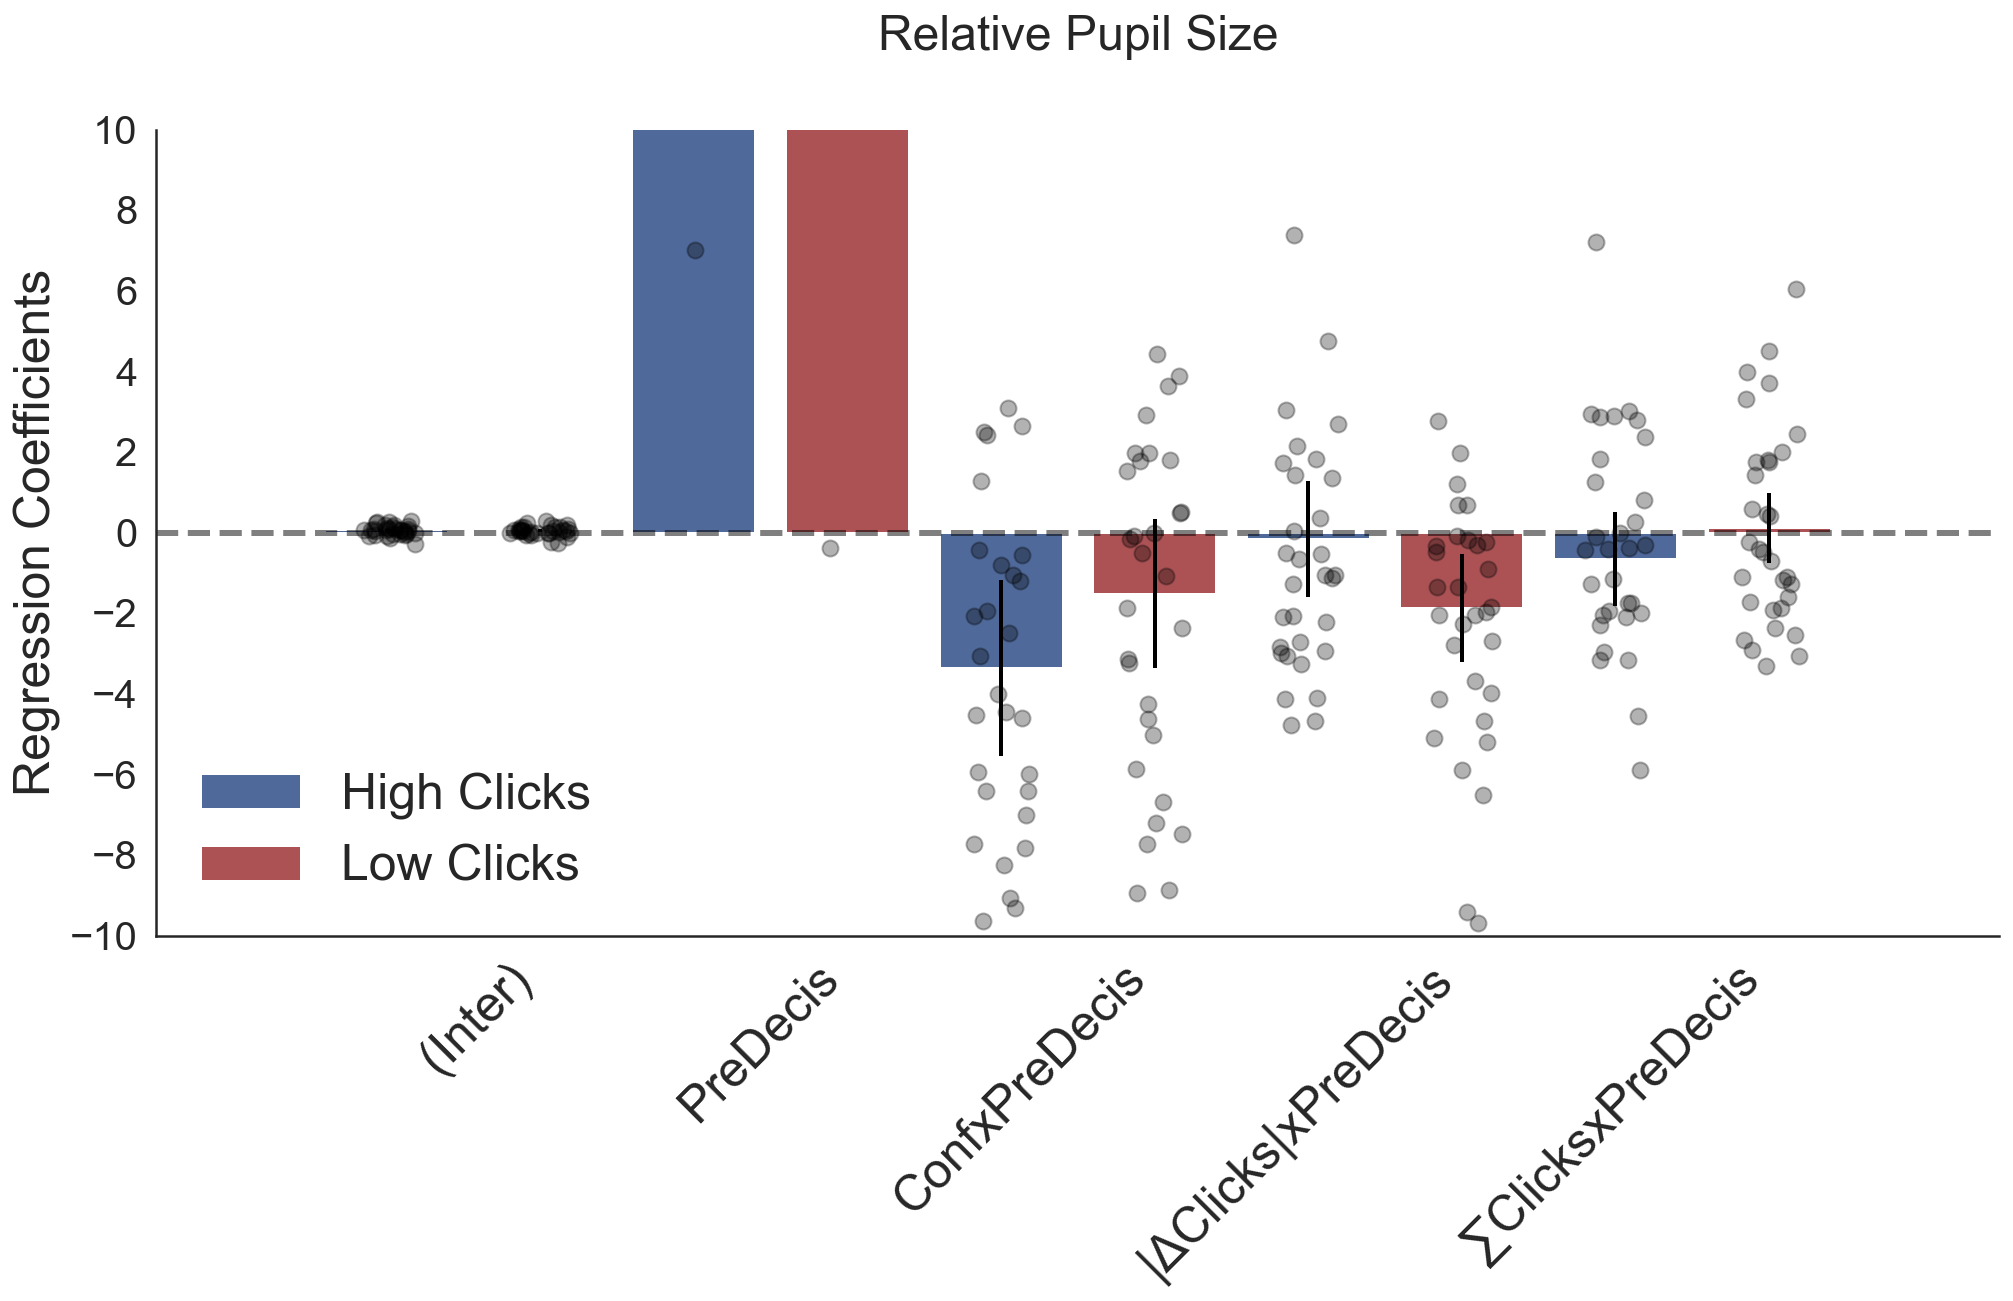

In [260]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=2, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.ylim(-10,10)
plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','∑ClicksxPreDecis'], rotation=45)

([<matplotlib.axis.XTick at 0x7f8cca4fa908>,
 [Text(1.25, 0, '(Inter)'),
  Text(2.25, 0, 'PreDecis'),
  Text(3.25, 0, 'ConfxPreDecis'),
  Text(4.25, 0, '|ΔClicks|xPreDecis'),
  Text(5.25, 0, '∑ClicksxPreDecis')])

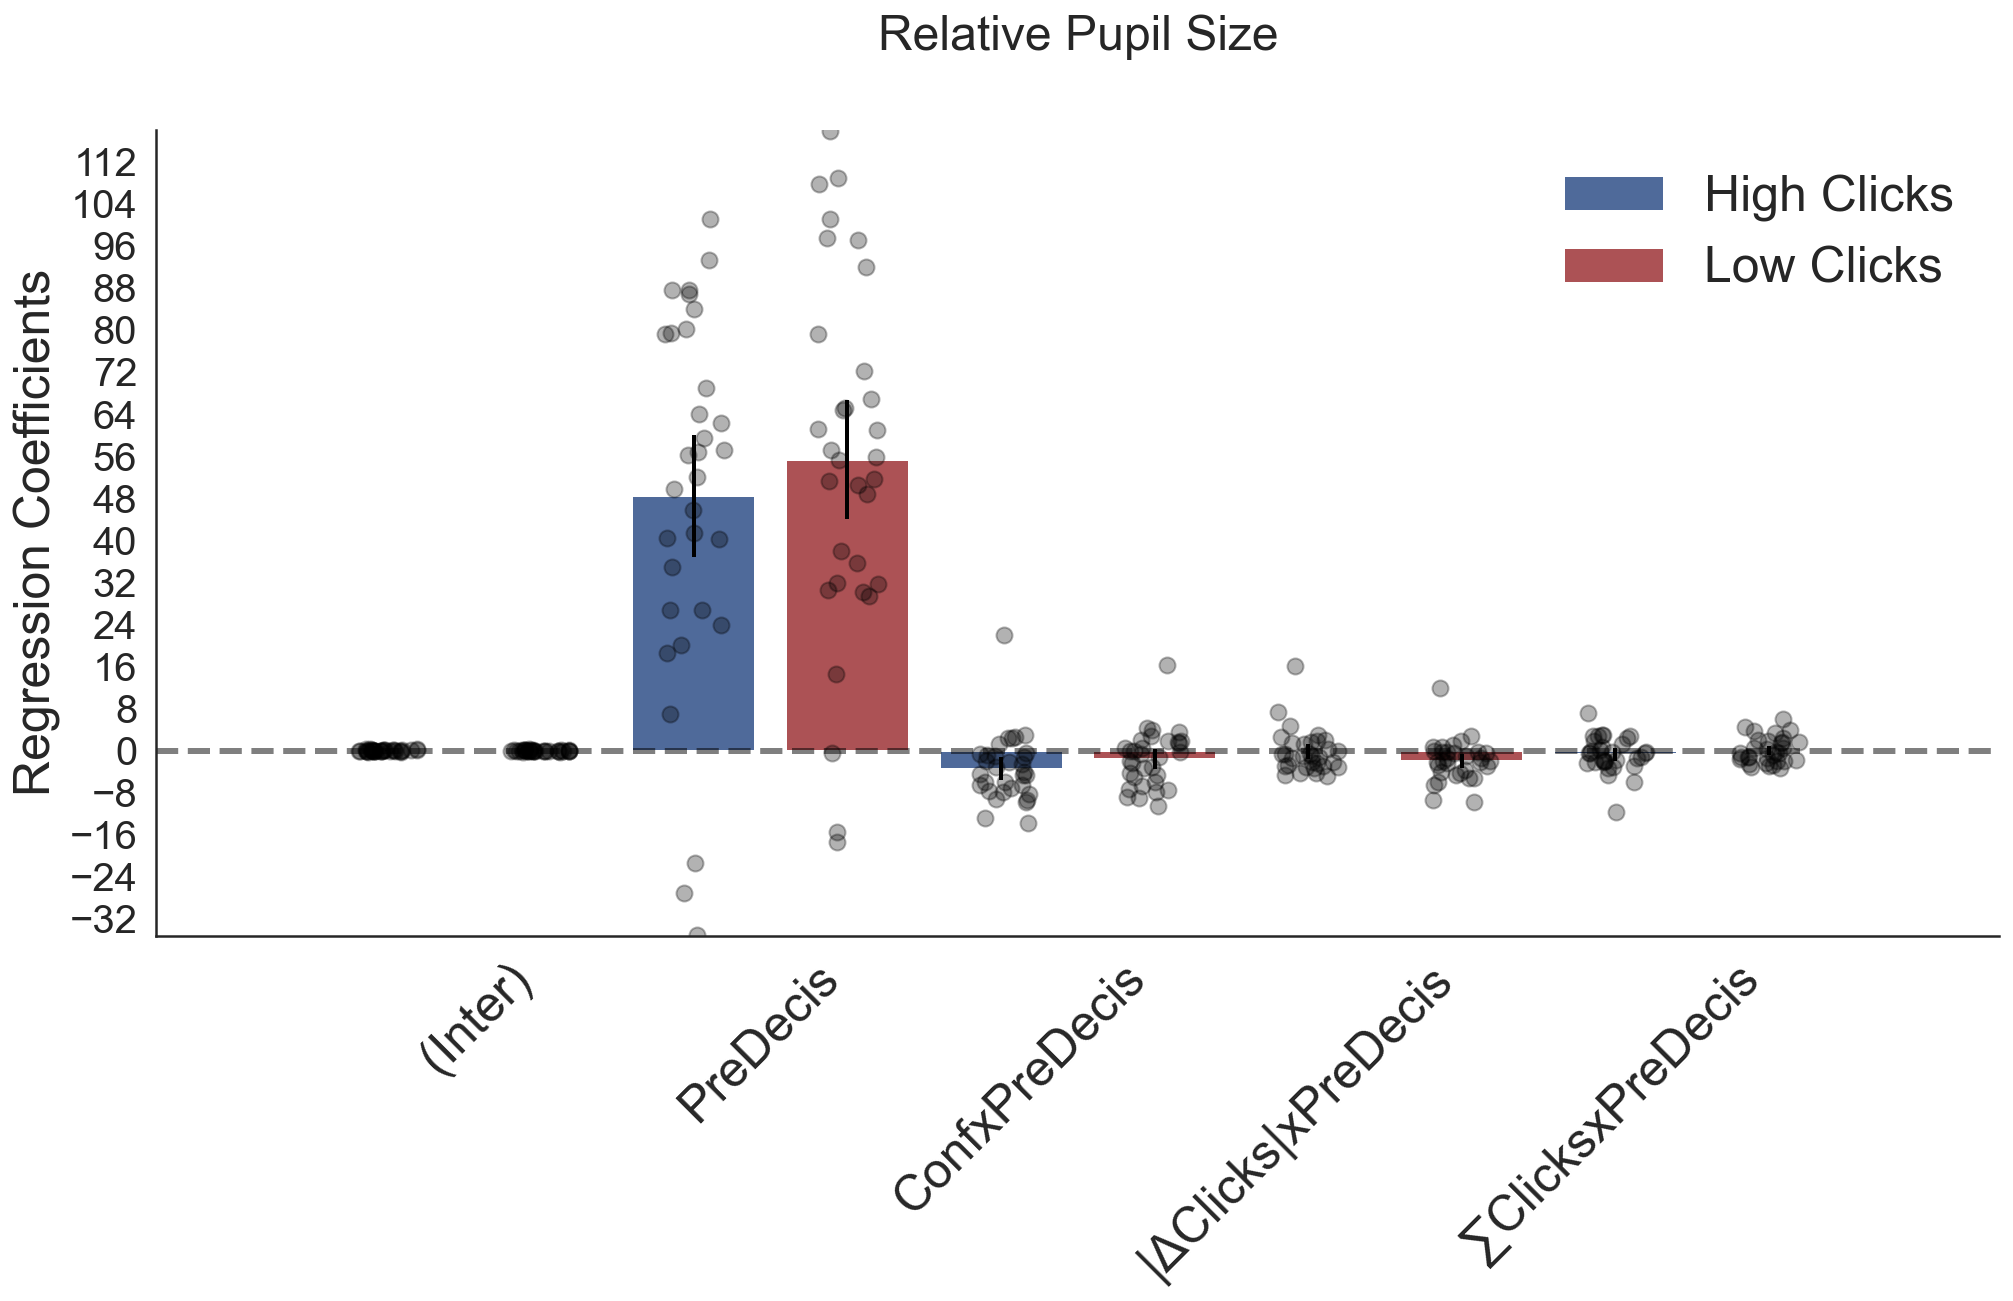

In [261]:
Coefpresplot_bar2(table_data1, par_table_data1,table_data2, par_table_data2, barcol1='#4F6A9A',barcol2='#AC5255', 
                  title='Relative Pupil Size', size='big',ymultiple=8, ticklabsize=20,labels= ['High Clicks','Low Clicks'])
plt.xticks([1.25,2.25,3.25, 4.25,5.25],['(Inter)','PreDecis','ConfxPreDecis','|ΔClicks|xPreDecis','∑ClicksxPreDecis'], rotation=45)

In [262]:
stats.ttest_rel(par_table_data1.SumCxPreDecis.values,par_table_data2.SumCxPreDecis.values)

Ttest_relResult(statistic=-1.0062957065473221, pvalue=0.32206390312406047)

In [263]:
print(np.mean(par_table_data1.SumCxPreDecis.values))
print(np.mean(par_table_data2.SumCxPreDecis.values))
print(np.mean(par_table_data1.SumCxPreDecis.values) - np.mean(par_table_data2.SumCxPreDecis.values))

-0.6546378856886426
0.12261059990613088
-0.7772484855947734


## -- [end ]

## Import packages

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [3]:
%%R
library(lme4)
#library(car)
library(optimx)
#library(ggplot2)
library(MASS)
#library(broom)
#library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

R[write to console]: Loading required package: Matrix

R[write to console]: 
arm (Version 1.10-1, built: 2018-4-12)


R[write to console]: Working directory is /Users/pradyumna/Documents/GiTs/pupilPEB2021/PupilPitch_FullParticipants


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




In [4]:
%%R
# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [5]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(10,10))

    for x in participants:
        # defining the sub figures
     #       sub={}
     #       sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
     #       sns.kdeplot(data.loc[data['part'] == x, var].values, ax = sub['%s' % x], shade=True)
     #       #if rug==True:
     #       #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
     #       sub['%s' % x].set_title('participant %s' % x)
     #       #sub['%s' % x].set_xlim(xlim)

            sns.kdeplot(data.loc[data['part'] == x, var].values, shade=True)

            
            order += 1
    fig.suptitle(title, fontsize = 25)


### Split variable into participantwise quantiles

In [6]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [7]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high,'r--', color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low,'r--', color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()
    
    return plt

### Full simple logistic graph (no bins)

In [8]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

### Regression Coefficients Plot

In [9]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [10]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [11]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [12]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [13]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [14]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(5, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [15]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(5,5))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('part. %s' % x, fontsize = 50 )


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='-')
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='-')
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='-')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=30)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4,fontsize=50)       

    fig.text(0.5, -0.01, xlab, ha='center',fontsize = 70)
    fig.text(-0.01, 0.5, ylab, va='center', rotation='vertical',fontsize = 70)
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [16]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [17]:
def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
    
    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(data_exp1["part"]):
            median_matrix_aux=[]
    
            for j in unique(data_exp1["frame"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = data_exp1.loc[data_exp1['part'] == i]
                Splitdata = Splitdata.loc[Splitdata['frame'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['Trial_Index_',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
    
                if len(SplitSort) != 2*len(median_low):
                    median_high=  [1] * int(len(SplitSort)-len(median_low))
                else: median_high = [1] * int (lenPart/2)
            
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            
            #print(["participant "+ str(i)+ " done"])
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
    
    return Split_cols

In [18]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
    
# Add asterisk
def add_star1(RT_like, RT_dislike, p):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
        
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [19]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value



def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
   #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [20]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
 
    # a list of all the participants in the dataset
    participants = data.loc[:, parvar].unique()
    fig = figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data[parvar] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [21]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=True, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0, hatch2 ='',labels = ['',''] ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    bar_sep= 0.25
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=24)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    XLim = (0, len(regtable1.columns)+1  )
    YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # else:
   #     XLim = (0, len(regtable1.columns) +1)
   #     YLim = (round_to_5(np.min([np.min(mixtable1),np.min(mixtable2)]))-0.2, round_to_5(np.max([np.max(mixtable1),np.max(mixtable2)]))+0.2)
   # if ylimits != ():
    #    YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    
    Coefficients = regtable1.columns
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        # Plot condition 1
        position += 1
        ax.bar(position-bar_sep, regtable1.loc['Estimate', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-bar_sep, regtable1.loc['Estimate', Coefficient],
                    yerr=regtable1.loc['SE', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+bar_sep, regtable2.loc['Estimate', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+bar_sep, regtable2.loc['Estimate', Coefficient],
                    yerr=regtable2.loc['SE', Coefficient]*1.96, lw=2, color='#000000')


   



   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    coef_num1 = range(0,len(mixtable1)) 
    for i in coef_num1:
        # Plot dots condition 1
        part_coefs = mixtable1.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) ,1 -  bar_sep+jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
    coef_num2 = range(0,len(mixtable2)) 
        
    for i in coef_num2:       
        
        # Plot dots condition 1
        part_coefs = mixtable2.iloc[i]
        position_parts= range(len(part_coefs))
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(np.sum([list(position_parts) , 1 +bar_sep-jittr], axis = 0), part_coefs.values, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, len(regtable1.columns)+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label

    ax.set_xticklabels(regtable1.columns, rotation=0)        
   
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=25)
    ax.xaxis.set_tick_params(labelsize=25)

    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    

    patch1 = mpatches.Patch(facecolor=colourlist1[position-1],hatch=r'', label=labels[0])
    patch2 = mpatches.Patch(facecolor=colourlist2[position-1],hatch=r'', label=labels[1])

    leg = plt.legend(handles=[patch1,patch2],fontsize=25)
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_linewidth(0.0)
    
    
    sns.despine()